
Exploratory Analysis For Online News Popularity - A deep insight analysis

In this project, the goal is the explore the dataset given and be able to find critical insights that can be used to influence potential article popularity. Also, machine learning models was built to be able to predict the popularity of a given article.

The process followed is highlighted below:

    Data Cleaning - Noise detection and removal
    Subjective analysis - Using our intuition to evaluate a data variable/feature and decide whether a variable influences the popularity of the article or not.
    Quantitative Analysis - How correct is our intuition? Here we carry our several analysis to accept or debunk our initial hypothesis
    Normal Distribuiton Observation on the dataset
    Feature Selection and Evaluation
    Machine Learning Classification
    Summary and Conclusion.



In [31]:
# Libaries import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

 Reading the data

In [32]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd

#DATA: Add shortcut to your google drive

# OnlineNewsPopularity.csv :
# https://drive.google.com/file/d/1AwStb9o5Lf5j8cWjgUa7rwqJqPNM5zzl/view?usp=sharing

data = pd.read_csv("drive/MyDrive/NLP/OnlineNewsPopularity.csv")

origianl_data = copy(data)


data.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

 Data Processing

In [33]:
# Here we drop the two non-preditive (url and timedelta) attributes. They won't contribute anything
data.drop(labels=['url', ' timedelta'], axis = 1, inplace=True)
data.head(n=4)

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   

    num_videos   average_token_length  ...   min_positive_polarity  \
0          0.0               4.680365  ...                0.100000   
1          0.0               4.913725  ...                0.033333   
2          0.0               4.393365  ...                0.100000   
3          0.0               4.404896  ...                0.136364   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                     0.7               -0.350000                  -0.600   
1                     0.7               -0.118750                  -0.125   
2                     1.0               -0.466667                  -0.800   
3                     0.8               -0.369697                  -0.600   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -0.200000                  0.5                    -0.1875   
1               -0.100000                  0.0                     0.0000   
2               -0.133333                  0.0                     0.0000   
3               -0.166667                  0.0                     0.0000   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                      0.0                         0.1875      593  
1                      0.5                         0.0000      711  
2                      0.5                         0.0000     1500  
3                      0.5                         0.0000     1200  

[4 rows x 59 columns]

In [34]:


# creating a grading criteria for the shares
share_data = data[' shares']
data[' shares'].describe(percentiles=[.20, .40, .60, .80])



count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
20%         870.600000
40%        1200.000000
50%        1400.000000
60%        1800.000000
80%        3400.000000
max      843300.000000
Name:  shares, dtype: float64

Grading the Shares

part_5 = 3400     -    843300

part_4 = 1800     -    3400

part_3 = 1200     -    1800

part_2 = 870     -    1200

part_1 = 1     -    870

In [35]:
# create label grades for the classes
share_label = list()
for share in share_data:
    if share < 870:
        share_label.append('part_1')
    elif share >= 870 and share < 1200:
        share_label.append('part_2')
    elif share >= 1200 and share < 1800:
        share_label.append('part_3')
    elif share >= 1800 and share < 3400:
        share_label.append('part_4')
    else:
        share_label.append('part_5')

# Update this class label into the dataframe
data = pd.concat([data, pd.DataFrame(share_label, columns=['popularity'])], axis=1)
data.head(4)

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   

    num_videos   average_token_length  ...   max_positive_polarity  \
0          0.0               4.680365  ...                     0.7   
1          0.0               4.913725  ...                     0.7   
2          0.0               4.393365  ...                     1.0   
3          0.0               4.404896  ...                     0.8   

    avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0               -0.350000                  -0.600               -0.200000   
1               -0.118750                  -0.125               -0.100000   
2               -0.466667                  -0.800               -0.133333   
3               -0.369697                  -0.600               -0.166667   

    title_subjectivity   title_sentiment_polarity   abs_title_subjectivity  \
0                  0.5                    -0.1875                      0.0   
1                  0.0                     0.0000                      0.5   
2                  0.0                     0.0000                      0.5   
3                  0.0                     0.0000                      0.5   

    abs_title_sentiment_polarity   shares  popularity  
0                         0.1875      593      part_1  
1                         0.0000      711      part_1  
2                         0.0000     1500      part_3  
3                         0.0000     1200      part_3  

[4 rows x 60 columns]

In [36]:
# Merging the weekdays columns channels as one single column
publishdayMerge=data[[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')
            
# Merging the data channels as one single column
DataChannelMerge=data[[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [37]:
# merge the the new data into the dataframe
data.insert(loc=11, column='weekdays', value=temp_arr)
data.insert(loc=12, column='data_channel', value=DataChannel_arr)

# Now I drop the old data
data.drop(labels=[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world', 
                 ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday'], axis = 1, inplace=True)
print(data.shape)
data.head(n=4)

(39644, 49)


n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   

    num_videos   average_token_length  ...   max_positive_polarity  \
0          0.0               4.680365  ...                     0.7   
1          0.0               4.913725  ...                     0.7   
2          0.0               4.393365  ...                     1.0   
3          0.0               4.404896  ...                     0.8   

   avg_negative_polarity  min_negative_polarity   max_negative_polarity  \
0              -0.350000                 -0.600               -0.200000   
1              -0.118750                 -0.125               -0.100000   
2              -0.466667                 -0.800               -0.133333   
3              -0.369697                 -0.600               -0.166667   

    title_subjectivity   title_sentiment_polarity   abs_title_subjectivity  \
0                  0.5                    -0.1875                      0.0   
1                  0.0                     0.0000                      0.5   
2                  0.0                     0.0000                      0.5   
3                  0.0                     0.0000                      0.5   

    abs_title_sentiment_polarity   shares  popularity  
0                         0.1875      593      part_1  
1                         0.0000      711      part_1  
2                         0.0000     1500      part_3  
3                         0.0000     1200      part_3  

[4 rows x 49 columns]

In [38]:
data.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'weekdays', 'data_channel', ' kw_min_min',
       ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
       ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' is_weekend', ' LDA_00', ' LDA_01',
       ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_

 Here we check the class balance

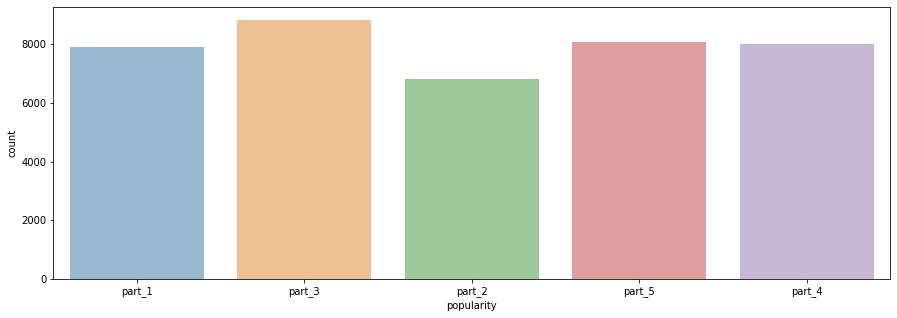

In [39]:
# Evaluating features (sensors) contribution towards the label
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='popularity',data=data,alpha=0.5)

In [40]:
# Fetch the counts for each class
class_counts = data.groupby('popularity').size().reset_index()
class_counts.columns = ['Popularity','No of articles']
class_counts


Popularity  No of articles
0     part_1            7904
1     part_2            6828
2     part_3            8823
3     part_4            8010
4     part_5            8079

 Data Visualization  
 
 Evaluating our hypothesis 

In [41]:
# Visualizaing the "low" expectation hypothesis
# n_non_stop_words
print(data[' n_non_stop_words'].describe())
# Comment - Visualizing the n_non_stop_words data field shows that the present of a record with 1042 value, 
# futher observation of that data shows that it belongs to entertainment which is not actually. It belongs to world news or others.
# this particluar also contains 0 on a lot of attributes. This record is classifed as a noise and will be remove.
data = data[data[' n_non_stop_words'] != 1042]
# Here, we will go ahead and drop the field of ' n_non_stop_words'
data.drop(labels=[' n_non_stop_words'], axis = 1, inplace=True)

count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name:  n_non_stop_words, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,



Noise Removal

    We observed some noise from the dataset coming from different features.



In [42]:
# remove noise from n_tokens_content. those equals to 0
data  = data[data[' n_tokens_content'] != 0]
print ("After noise removal - ",data.shape)

After noise removal -  (38462, 48)


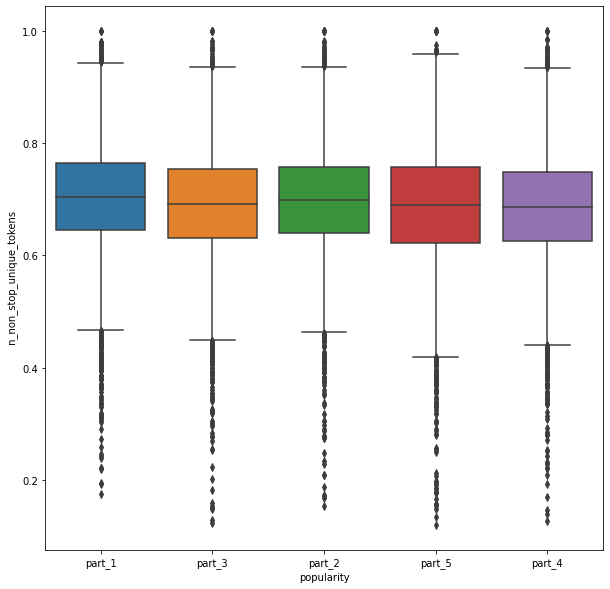

In [46]:



# n_non_stop_unique_tokens
data[' n_non_stop_unique_tokens'].describe()
# a lot of unique words, it is better to use a different plot from bar plots
# line plot
temp_data = data[data[' shares'] <= 100000]
fig, axes = plt.subplots(figsize=(10,10))
# box plot
sns.boxplot(x='popularity', y=' n_non_stop_unique_tokens', data=data, ax=axes)
# box plot of the dataset shows majority (75%) of the data inrespective of their shares is in the range of 0.6 - 0.8.
# So does it offers any uniques? No, it doesn't.




In [47]:



#kw_min_min and related kw_ terms
data[' kw_min_min'].describe()
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', 
            ' kw_max_avg', ' kw_avg_avg', ' shares']
# run a pairplot
#sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')




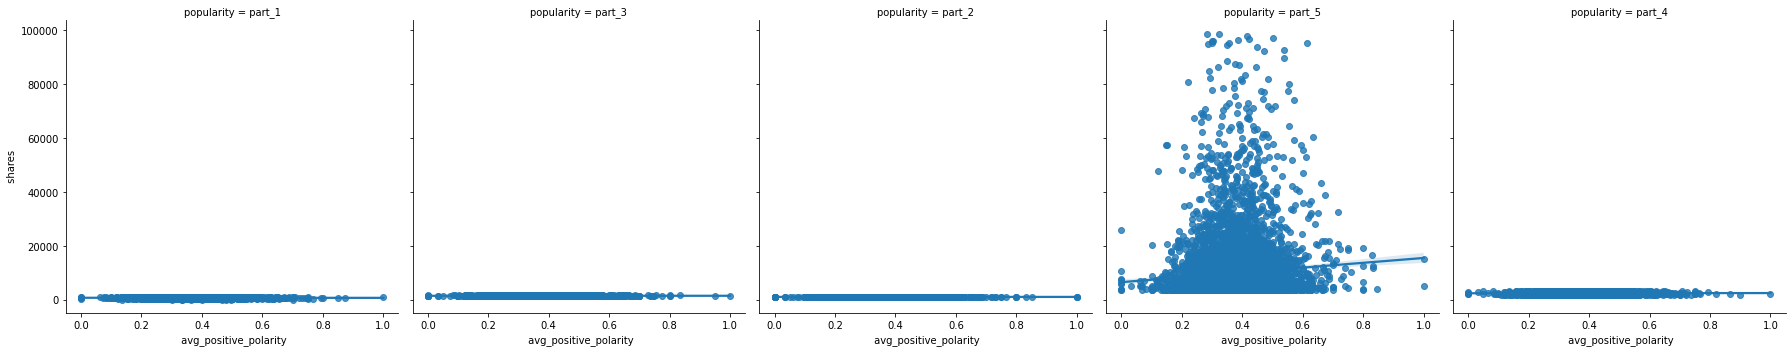

In [48]:



# attempt polartiy
temp_data = data[data[' shares'] <= 100000]
sns.lmplot(x=' avg_positive_polarity', y=' shares', col='popularity', data=temp_data)




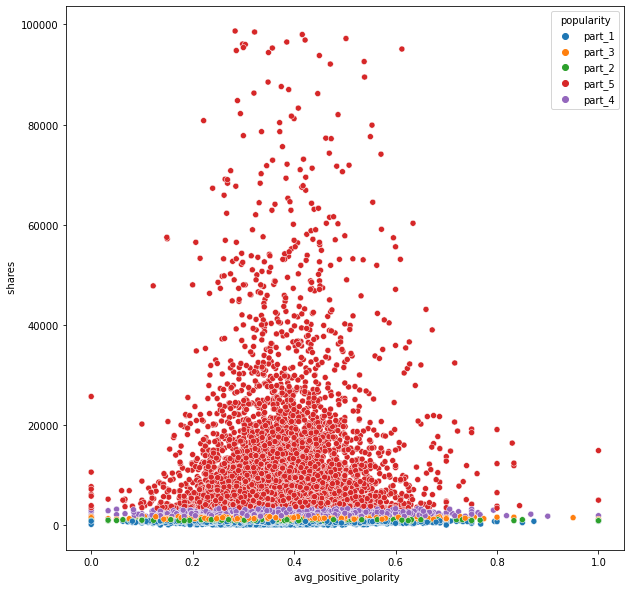

In [49]:


# attempt polartiy
temp_data = data[data[' shares'] <= 100000]
fig, axes = plt.subplots(figsize=(10,10))
sns.scatterplot(x=' avg_positive_polarity', y=' shares', hue='popularity', data=temp_data, ax=axes)




'\navg_positive_polarity and avg_negative_polarity are good features with some clear observation \n'

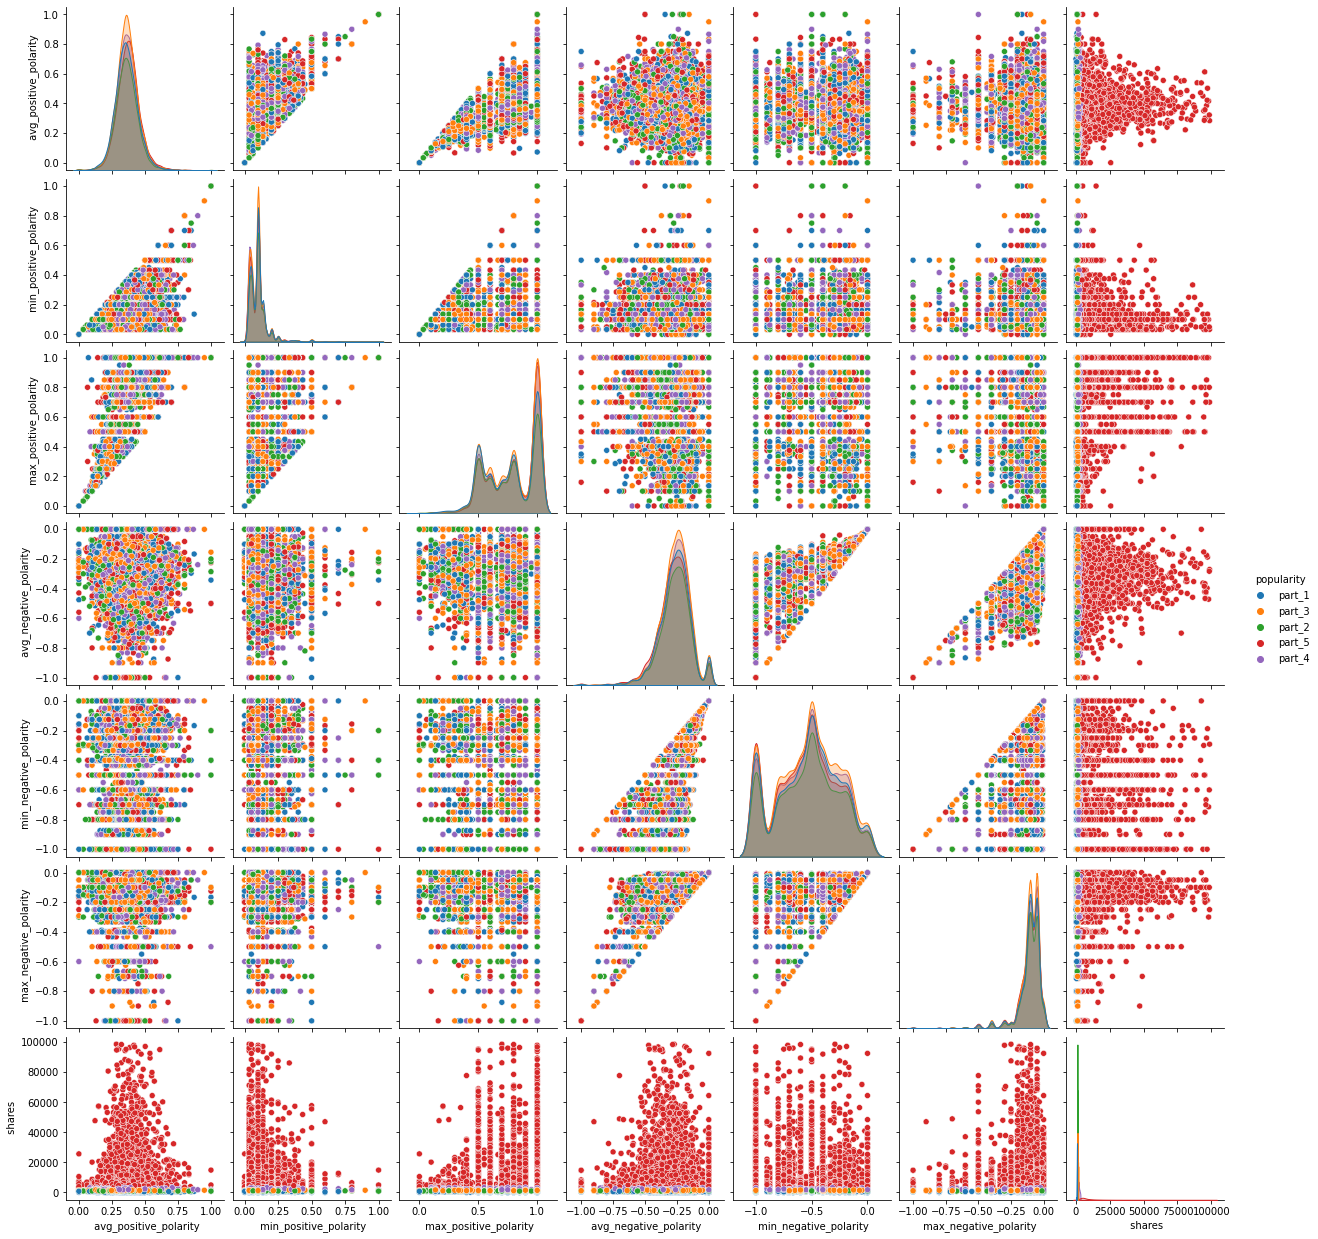

In [50]:



#Finding relationship between 'rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', and 'shares'
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the terms
kw_cols = [' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

'''
avg_positive_polarity and avg_negative_polarity are good features with some clear observation 
'''



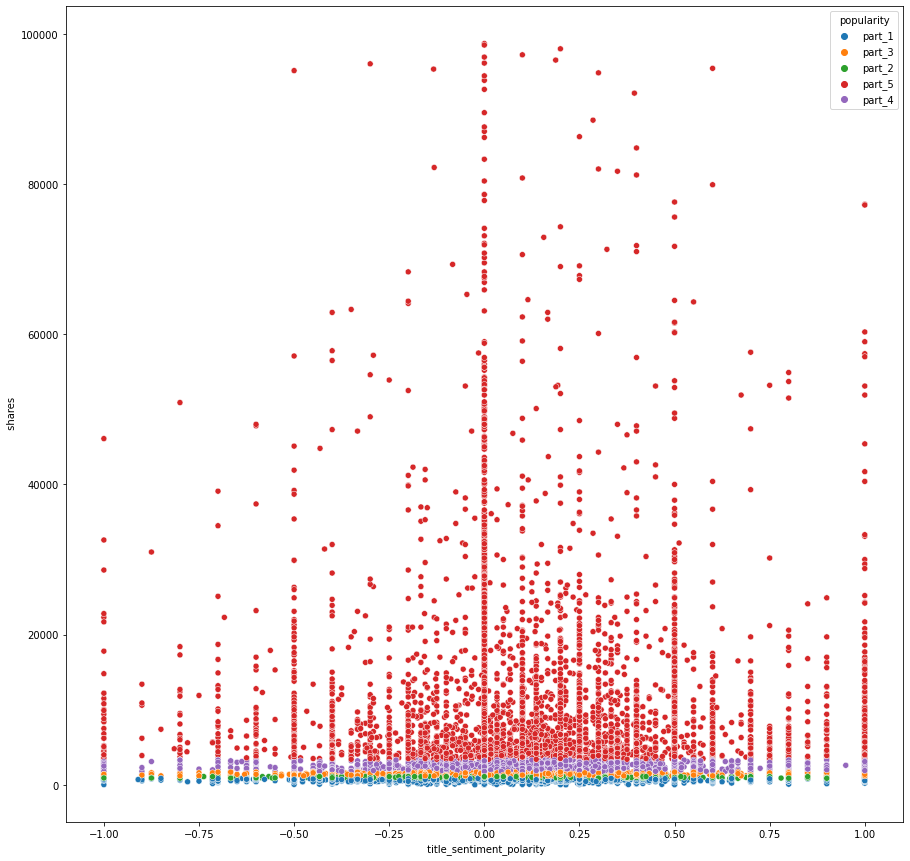

In [51]:



# attempt title_subjectivity
temp_data = data[data[' shares'] <= 100000]
fig, axes = plt.subplots(figsize=(15,15))
sns.scatterplot(x=' title_sentiment_polarity', y=' shares', hue='popularity', data=temp_data, ax=axes)




/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


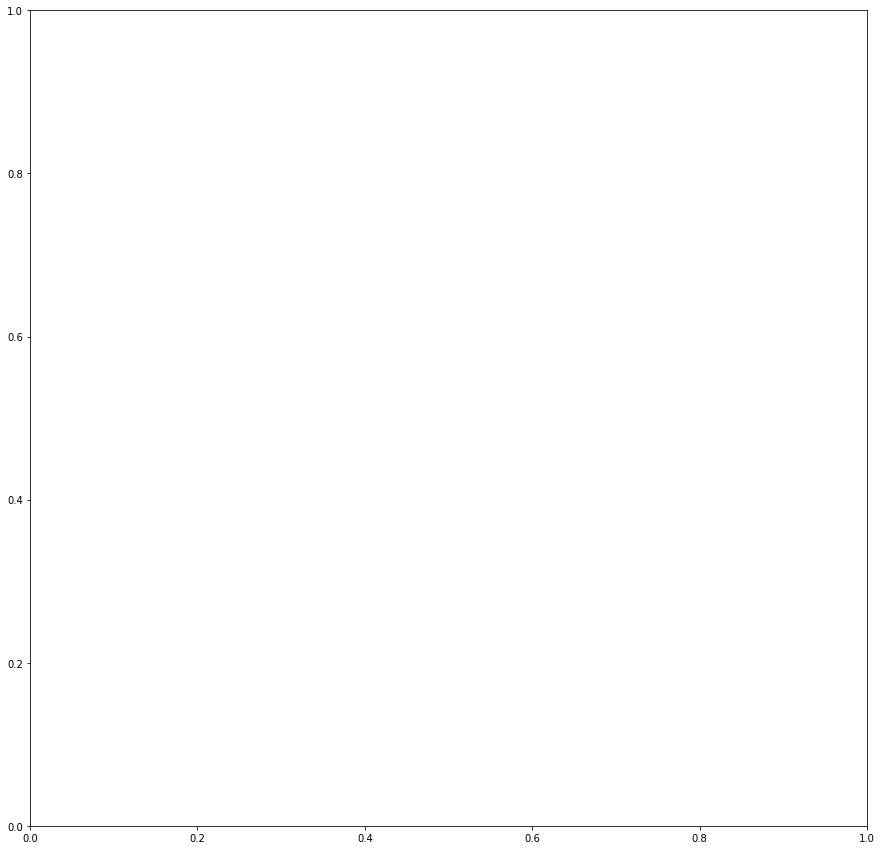

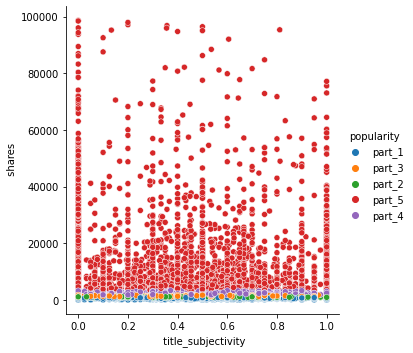

In [52]:
# attempt title_subjectivity
temp_data = data[data[' shares'] <= 100000]
fig, axes = plt.subplots(figsize=(15,15))
sns.relplot(x=' title_subjectivity', y=' shares', hue='popularity', data=temp_data, ax=axes)

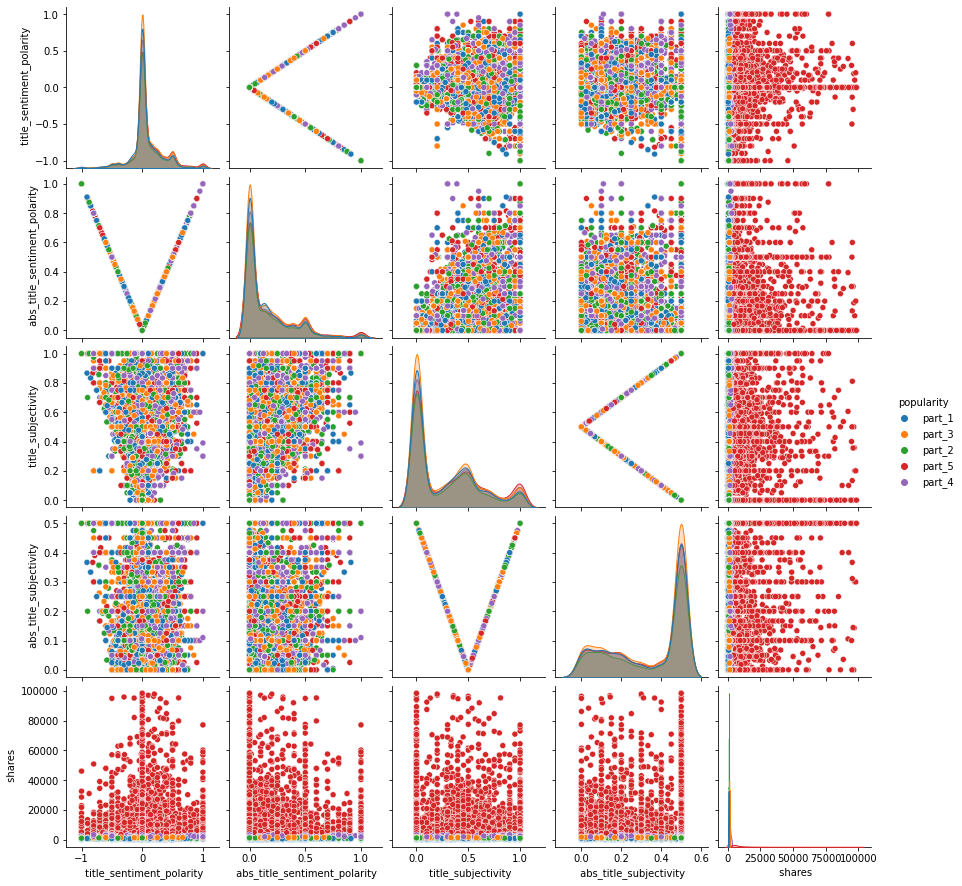

In [53]:
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' title_sentiment_polarity', ' abs_title_sentiment_polarity', ' title_subjectivity', ' abs_title_subjectivity', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')


Evaluating Expectations

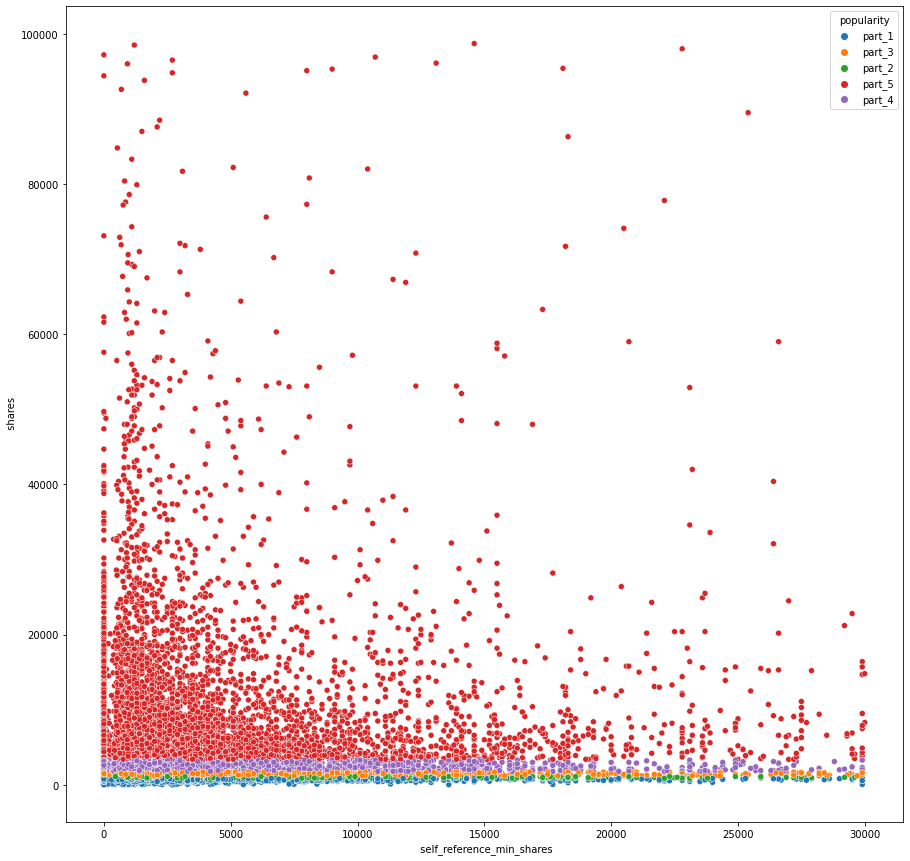

In [54]:
# attempt self_reference_min_shares
temp_data = data[(data[' shares'] <= 100000) & (data[' self_reference_min_shares'] <= 30000)]
fig, axes = plt.subplots(figsize=(15,15))
sns.scatterplot(x=' self_reference_min_shares', y=' shares', hue= 'popularity', data=temp_data, ax=axes)

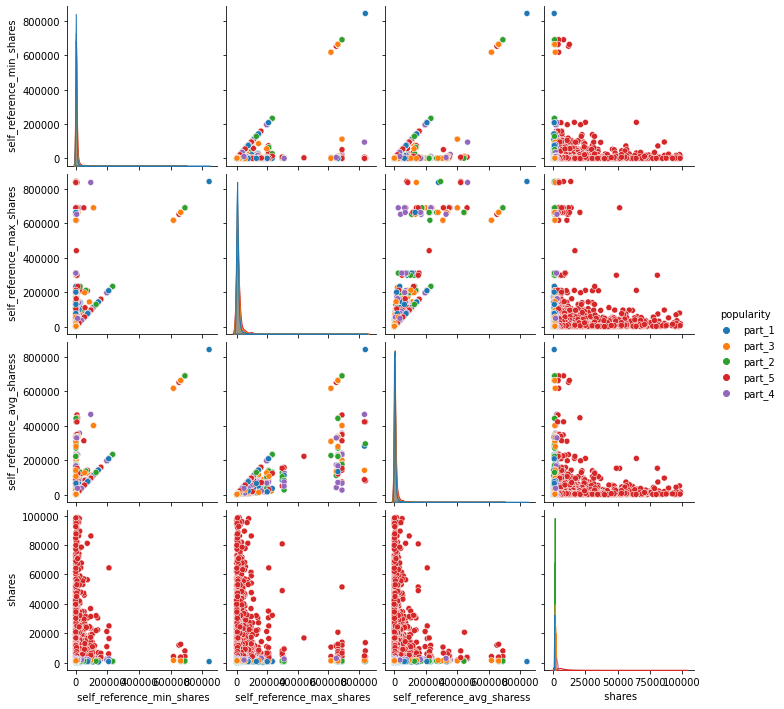

In [55]:


temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')



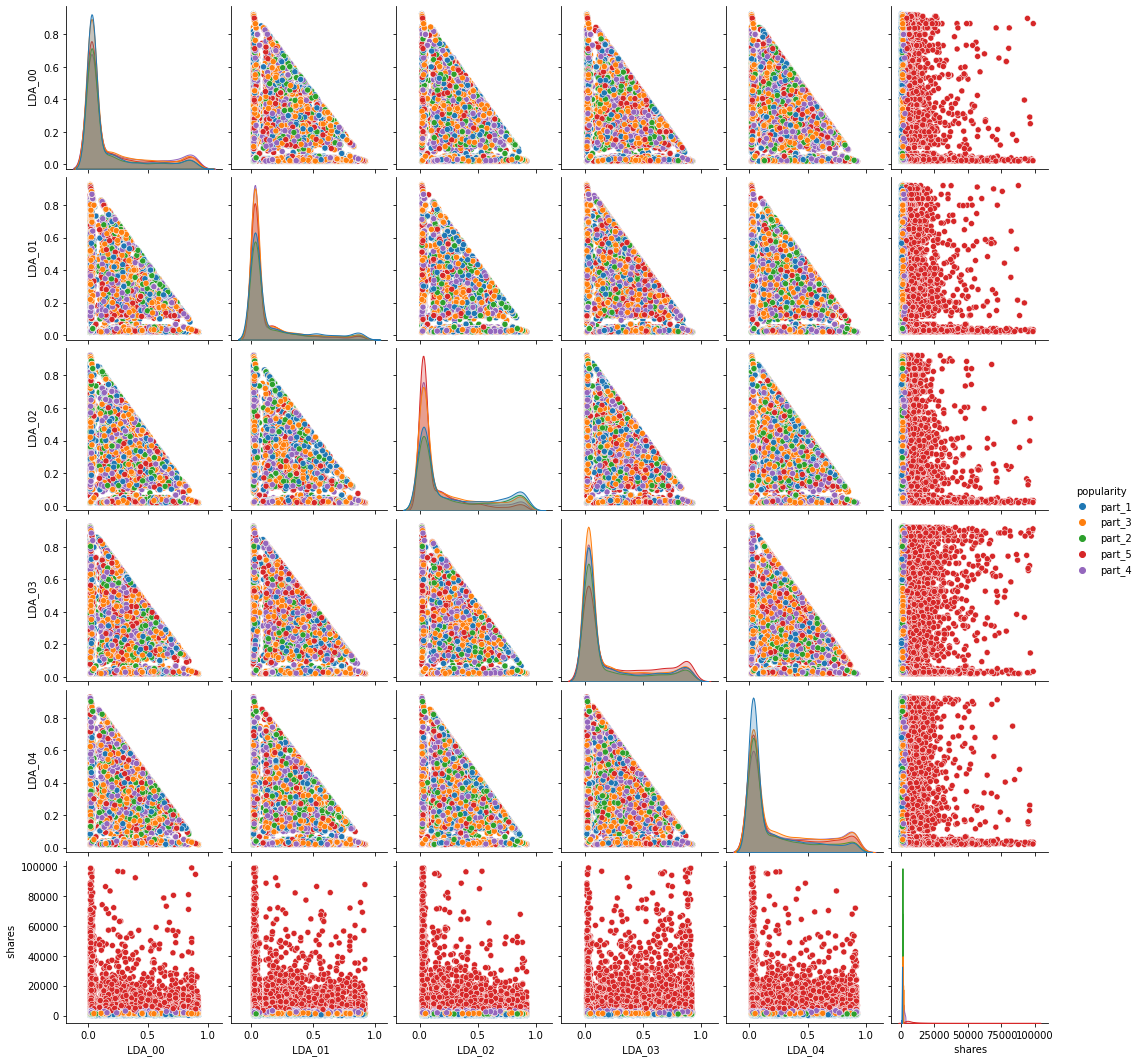

In [56]:
#### LDA - 0: 5
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')


Weekdays Variable Effect

In [57]:
# extact the weekdays articles distrubution
weekdays_data = data.groupby('weekdays').size().reset_index()
weekdays_data.columns = ['weekdays','count']
weekdays_data

weekdays  count
0     Friday   5538
1     Monday   6471
2   Saturday   2369
3     Sunday   2657
4   Thursday   7052
5     Tueday   7170
6  Wednesday   7205

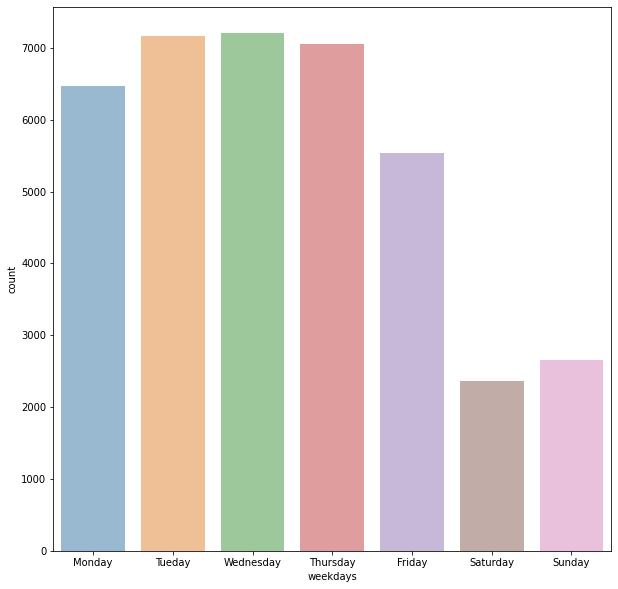

In [58]:


# shows the days when articles are usually posted
fig, axes = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='weekdays',data=data,alpha=0.5, ax=axes)



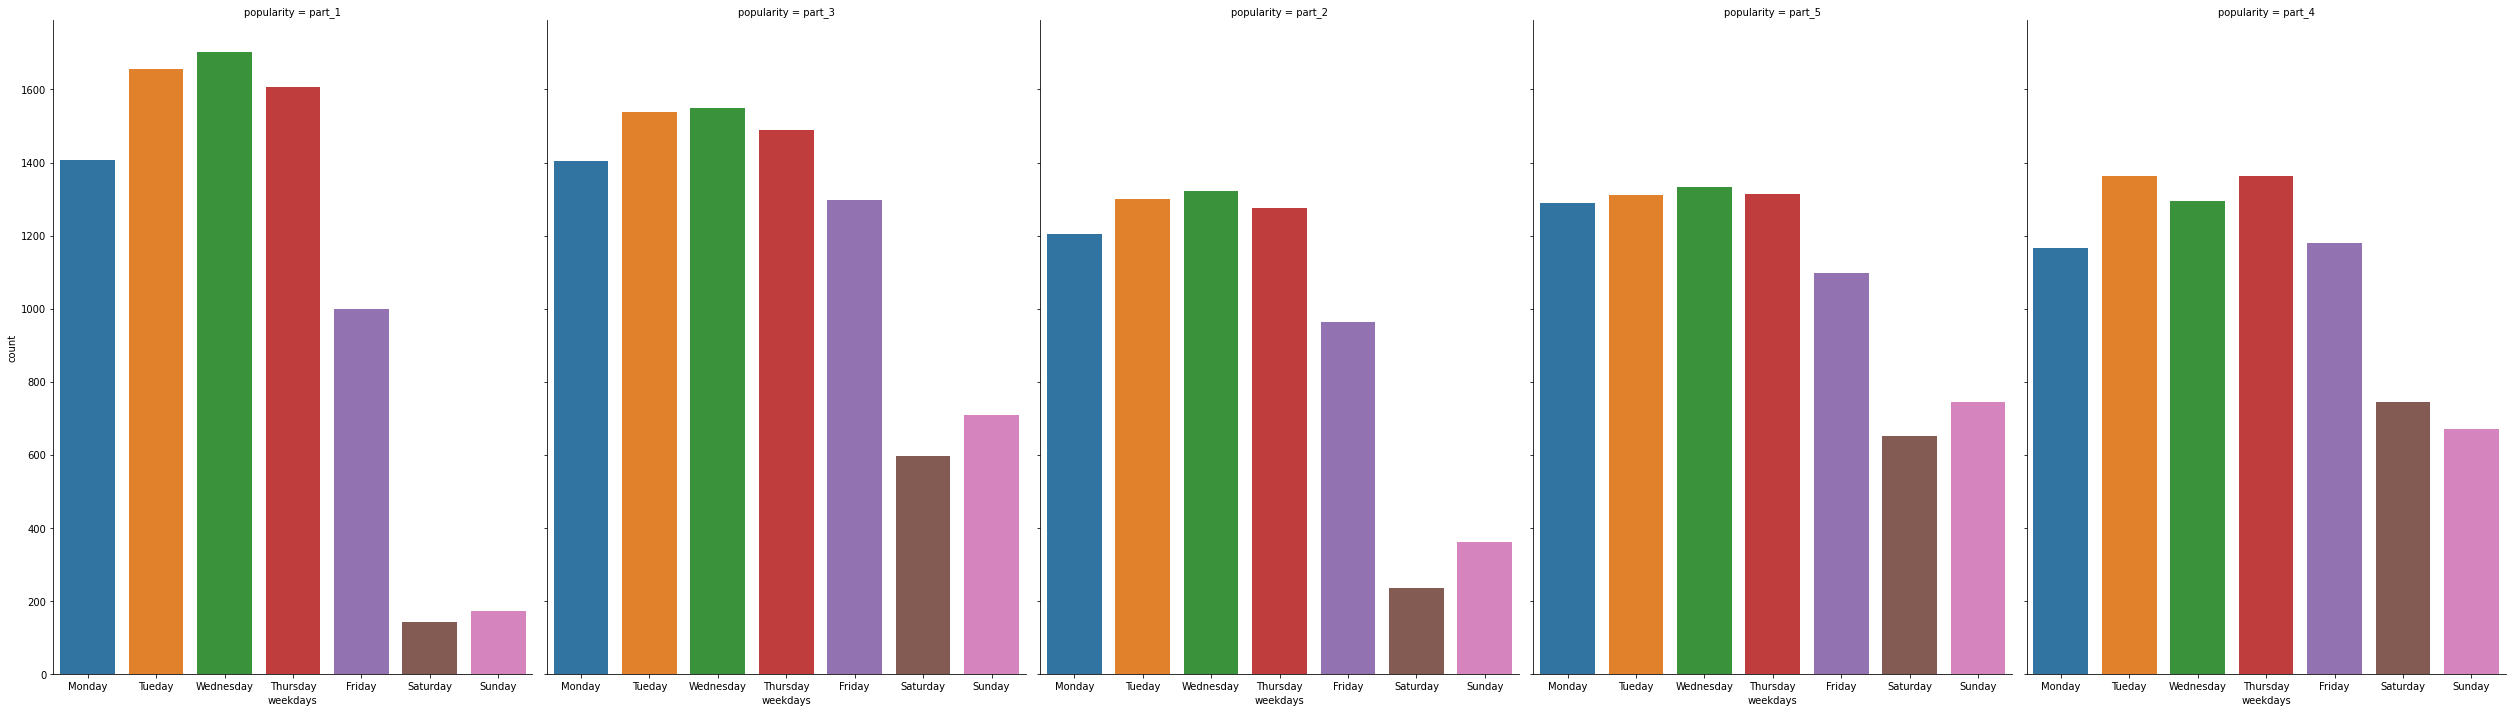

In [62]:
# shows relationship with the number of shares and the weekdays
temp_data = data[(data['popularity'] == 'part_1') | (data['popularity'] == 'part_2') | (data['popularity'] == 'part_3') | (data['popularity'] == 'part_4') | (data['popularity'] == 'part_5')]
ax = sns.catplot(x='weekdays', col="popularity", data=temp_data, kind="count", height=10, aspect=.7)

'\n'

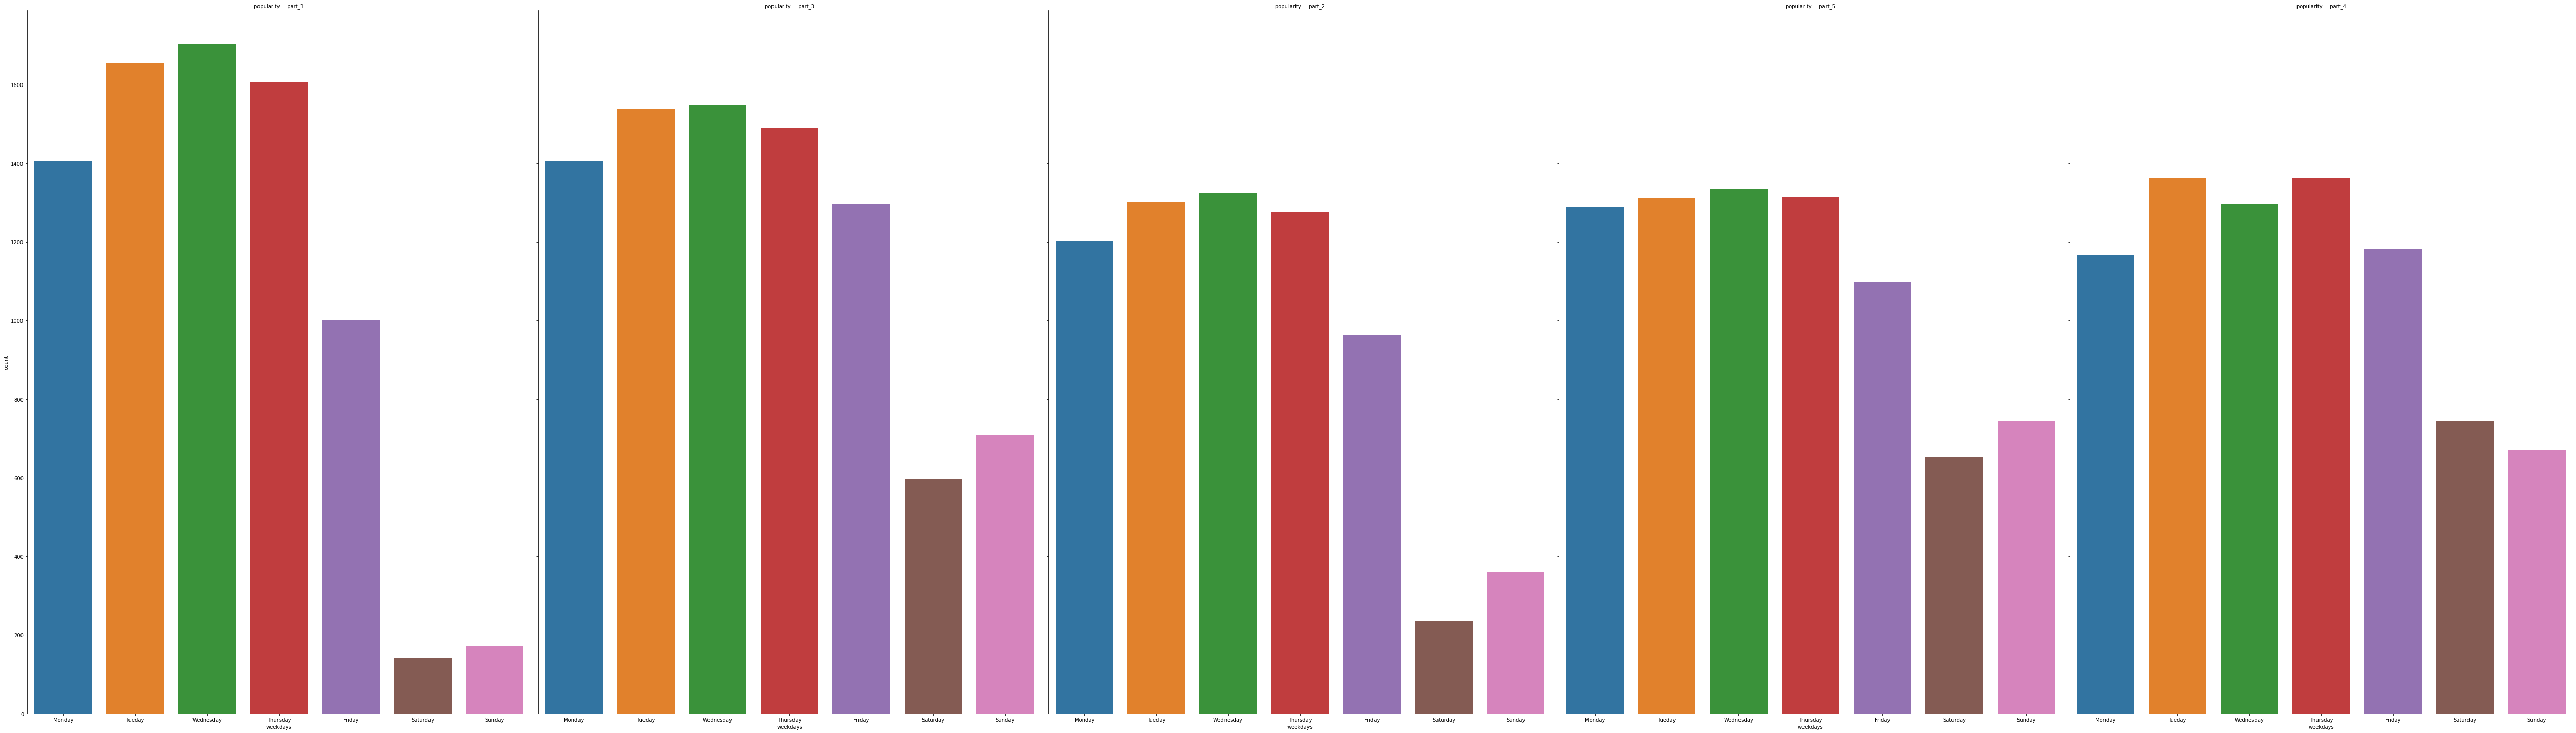

In [63]:
# shows relationship with the number of shares and the weekdays (compare only the best three popularity)
temp_data = data[(data['popularity'] == 'part_1') | (data['popularity'] == 'part_2') | (data['popularity'] == 'part_3') | (data['popularity'] == 'part_4') | (data['popularity'] == 'part_5')]

ax = sns.catplot(x='weekdays', col="popularity", data=temp_data, kind="count", height=20, aspect=.7)

'''
'''



It seems the best popular articles are usually posted on Mondays and Wednesday (and a bit of tuesdays) Sundays and Saturdays (Weekends generally) are the worsts days to publish an articles. Your chances are low


In [64]:
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' average_token_length', ' num_keywords', ' global_subjectivity', ' global_sentiment_polarity', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')


Data Channel Evaluation

Here, it can be seen that the best articles with highest share popularity belongs to the "Others" channel. For a more concrete channel, The "Business" and "Entertaiment" channel are great for the best popularity. Coming in third position will be the "World" and "Tech". Tech channels performed generally okay. One important observation is also that "Entertaiment" channel based articls seems to be persistent in all popularity types. Meaning they might not always be the best channel to publish for.


In [65]:
## Seeing the distribution of the articles across the data channels
# extact the weekdays articles distrubution
data_channel_data = data.groupby('data_channel').size().reset_index()
data_channel_data.columns = ['Data Channels','No of articles']
data_channel_data

Data Channels  No of articles
0       Business            6235
1  Entertainment            6855
2      Lifestyle            2077
3         Others            5491
4   Social Media            2311
5           Tech            7325
6          World            8168

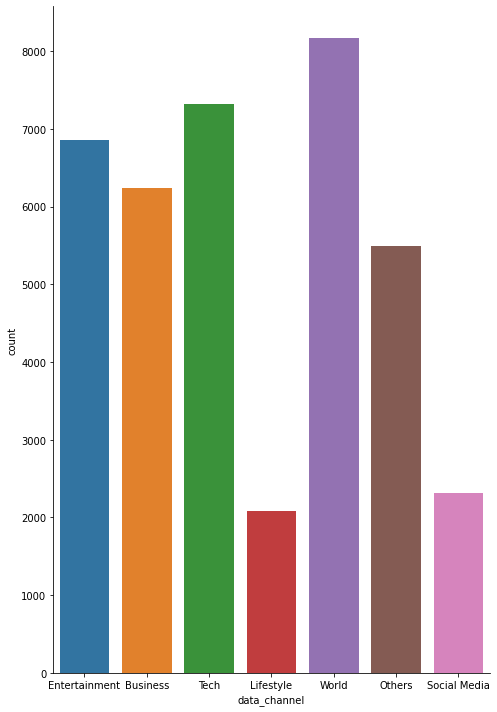

In [66]:


# Shows the distribution of the articles across the channels
sns.catplot(x='data_channel', data=data, kind="count", height=10, aspect=.7)



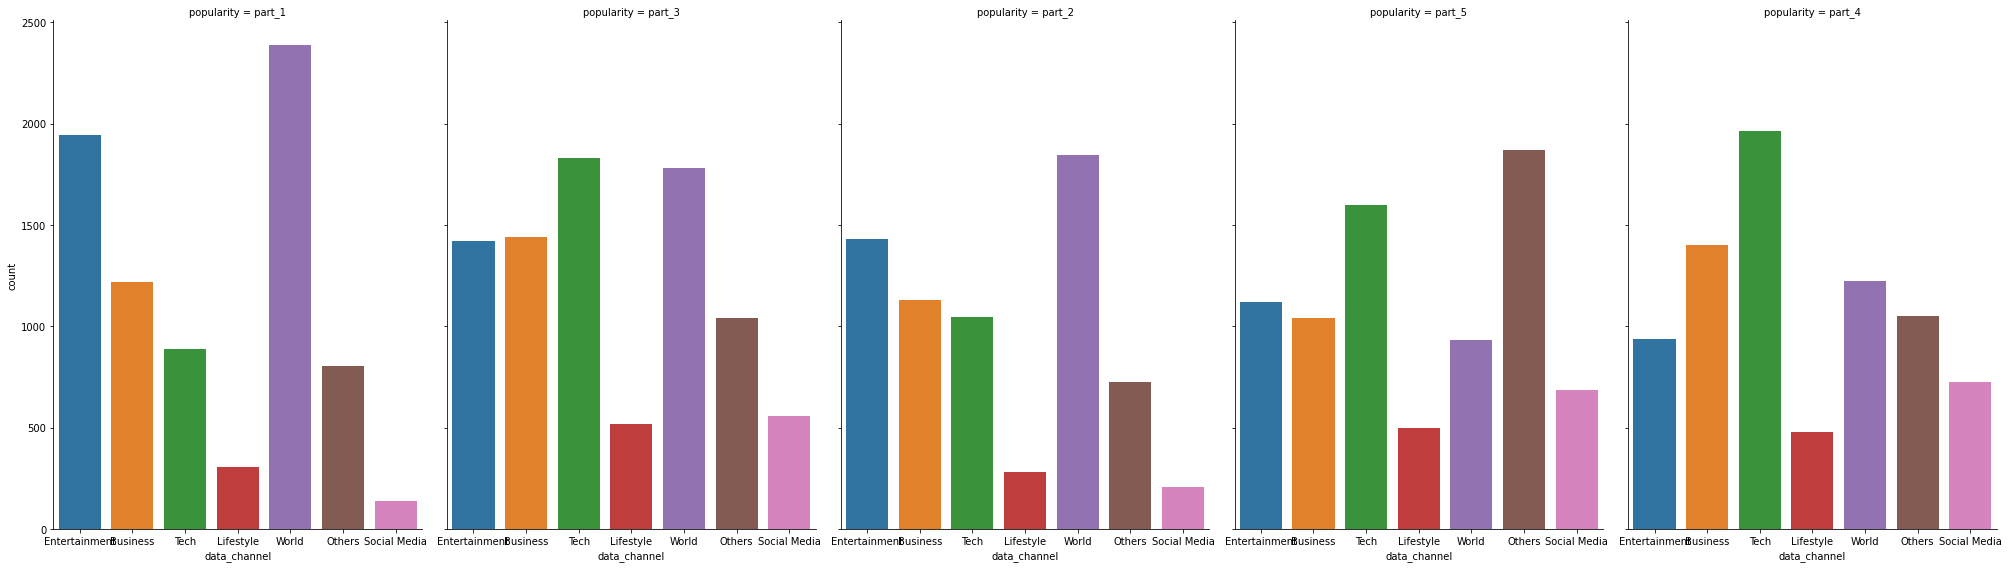

In [67]:
#the ranking of the channels in regards to the shares popularity
temp_data = data[(data['popularity'] == 'part_1') | (data['popularity'] == 'part_2') | (data['popularity'] == 'part_3') | (data['popularity'] == 'part_4') | (data['popularity'] == 'part_5')]

ax = sns.catplot(x='data_channel', col="popularity", data=temp_data, kind="count", height=8, aspect=.7)

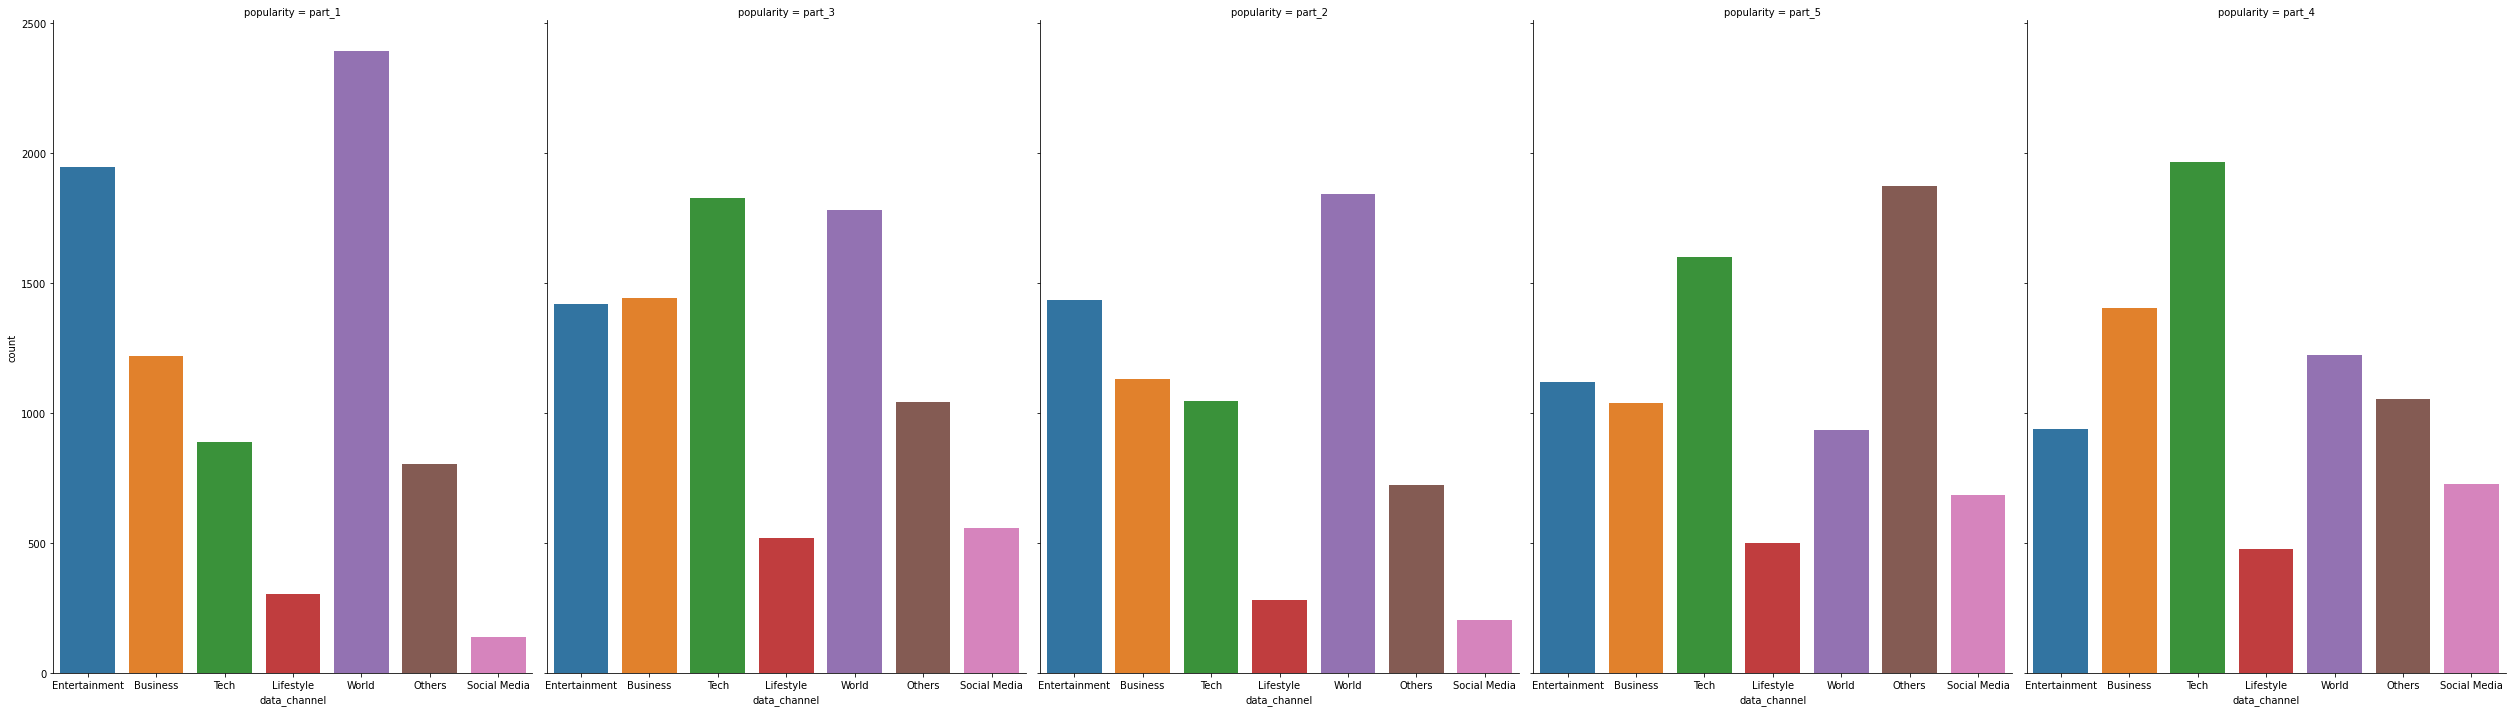

In [68]:
# shows relationship with the number of shares and the ranking of the channels (compare only the best three popularity)
temp_data = data[(data['popularity'] == 'part_1') | (data['popularity'] == 'part_2') | (data['popularity'] == 'part_3') | (data['popularity'] == 'part_4') | (data['popularity'] == 'part_5')]

ax = sns.catplot(x='data_channel', col="popularity", data=temp_data, kind="count", height=10, aspect=.7)


Evaluating the Observerd Hypothesis


Data channels vs Num_images vs popularity

Here we compared data channels impact with num images in regards to article popularity - Earlier we said, good articles tend to have high visuals (num_images) in them but it is not always the case everytime. Those rare cases where the high visuals or low visuals doesn't change anything is in the Business channel. From the plot below, we can see that Business channels generally don't get influnece by the num_images in them. They are generally low inrespective of the popularity. This is peculiar pattern. Entertainment channels generally tend to have high visuals as their popularity increases, with the only exception in 'Average' popularity.


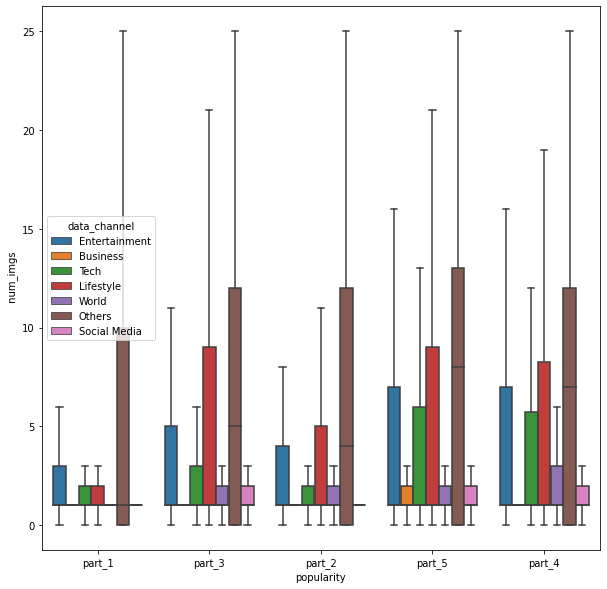

In [69]:
fig,ax = plt.subplots(figsize=(10,10))
temp_data = data[data[' num_imgs'] <= 25]
sns.boxplot(x='popularity',y=' num_imgs', hue='data_channel', data=temp_data, showfliers=False)


Making Recommendations For Good Articles

    n_tokens_content should be less than 1500 words. The lesser the better.
    n_tokens_title should be between 6 - 17 words.
    n_unique_tokens should be between 0.3 - 0.8
    num_hrefs is between 1 and 40 referrence links
    num_imgs should between 1 - 40 images
    num_videos should be between 0 - 25 vidoes. The higher the lower the odds.
    average_token_length should be between 4 - 6
    The number of keywords in the metedata really influences the shares to a margin. The higher the value the better the shares chances. A value upward of 5 is recommend.
    Here, it can be seen that the best articles with highest share popularity belongs to the "Others" channel. For a more concrete channel, The "Business" and "Entertaiment" channel are great for the best popularity. Coming in third position will be the "World" and "Tech".
    Best popular articles are usually posted on Mondays and Wednesday (and a bit of tuesdays). Sundays and Saturdays (Weekends generally) are the worsts days to publish an articles.
    Articles that talks about current trending are better for shares





        From the scatterplot below, it can be seen than good articles will generally tend to have n_tokens_content less than 2000 and greater than 100 words



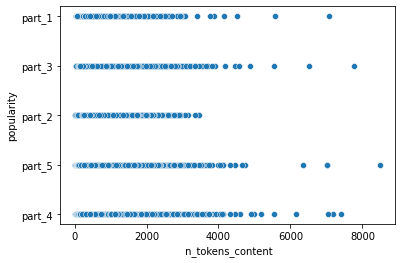

In [70]:
#n_tokens_content
sns.scatterplot(x=' n_tokens_content',y='popularity', data=data)



        From the scatterplot below, it can be seen than good articles will generally tend to have n_tokens_title between 6 and 17 words



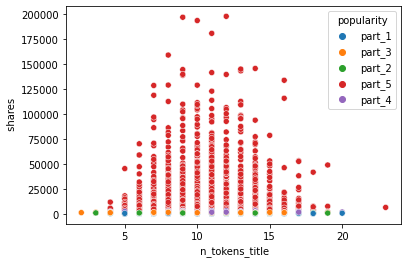

In [72]:
#n_tokens_title
temp_data = data[data[' shares'] <= 200000]
sns.scatterplot(x=' n_tokens_title',y=' shares', hue='popularity', data=temp_data)

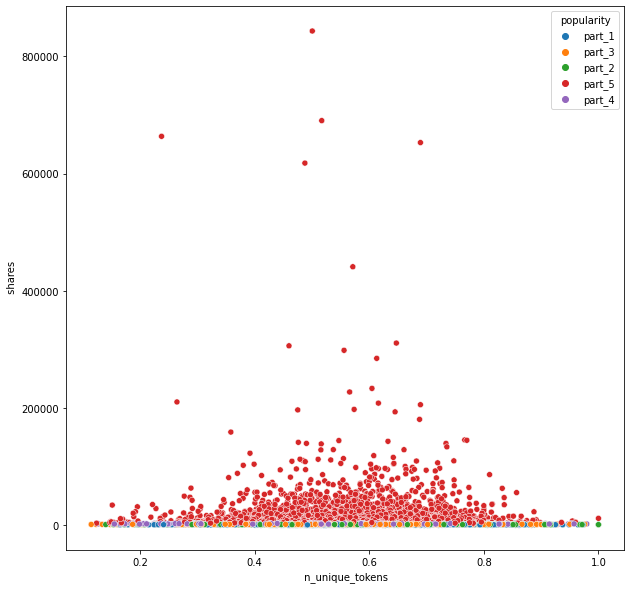

In [73]:
#n_tokens_title
temp_data = data[data[' shares'] <= 200000]
plt.figure(figsize=(10,10))
sns.scatterplot(x=' n_unique_tokens',y=' shares', hue='popularity', data=data)

In [74]:
#num_hrefs
temp_data = data[data[' shares'] <= 100000]
sns.scatterplot(x=' num_hrefs',y=' shares', hue='popularity', data=temp_data)

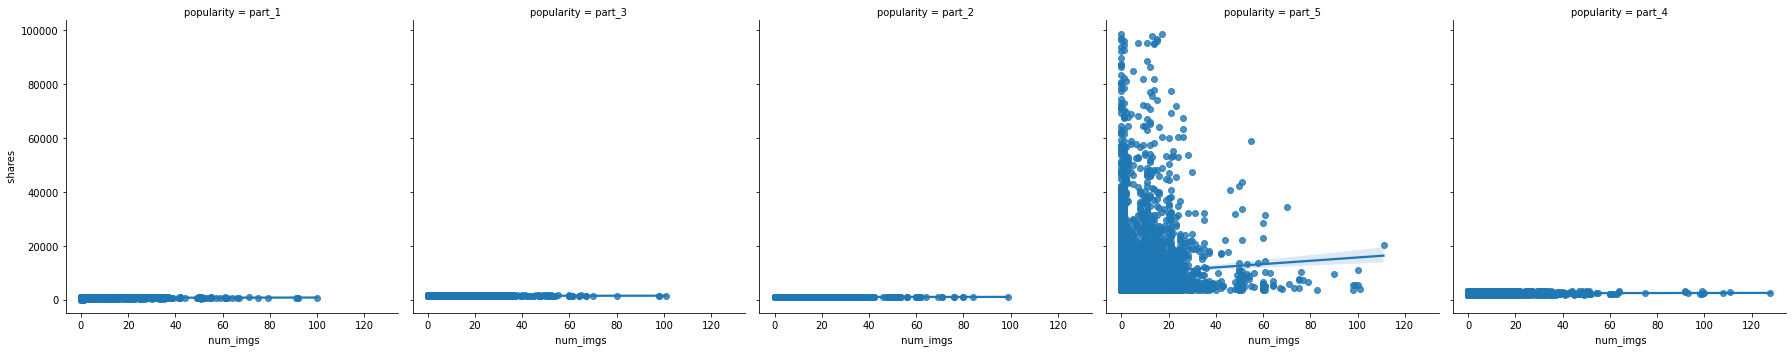

In [75]:
#num_imgs
temp_data = data[data[' shares'] <= 100000]
#plt.figure(figsize=(30,10))
#sns.barplot(x=' num_imgs',y=' shares', hue='popularity', data=temp_data)
sns.lmplot(x=' num_imgs', y=' shares', col='popularity', data=temp_data)

(24660, 48)


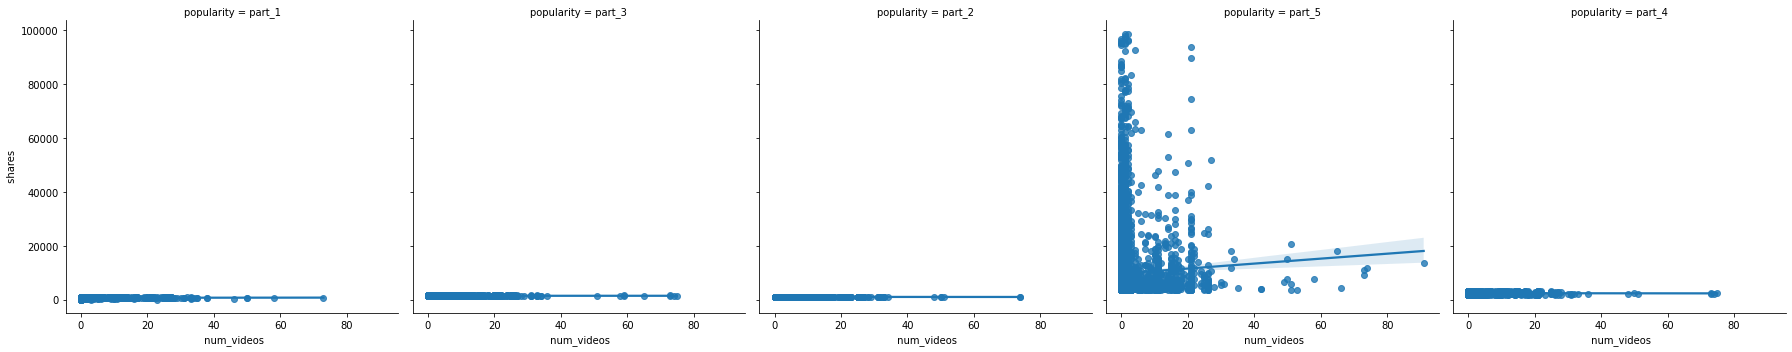

In [76]:
#num_videos
temp_data = data[data[' shares'] <= 100000]
noise_data  = data[data[' num_videos'] == 0]
print (noise_data.shape)
#plt.figure(figsize=(30,10))
#sns.barplot(x=' num_imgs',y=' shares', hue='popularity', data=temp_data)
sns.lmplot(x=' num_videos', y=' shares', col='popularity', data=temp_data)

In [77]:
#average_token_length
temp_data = data[data[' shares'] <= 100000]
noise_data  = data[data[' average_token_length'] == 0]
print (noise_data.shape)
#plt.figure(figsize=(30,10))
sns.scatterplot(x=' average_token_length',y=' shares', hue='popularity', data=temp_data)

(0, 48)


In [78]:


#num_keywords
temp_data = data[data[' shares'] <= 100000]
noise_data  = data[data[' num_keywords'] == 0]
print (noise_data.shape)
#plt.figure(figsize=(30,10))
sns.scatterplot(x=' num_keywords',y=' shares', hue='popularity', data=temp_data)



(0, 48)


(5993, 48)


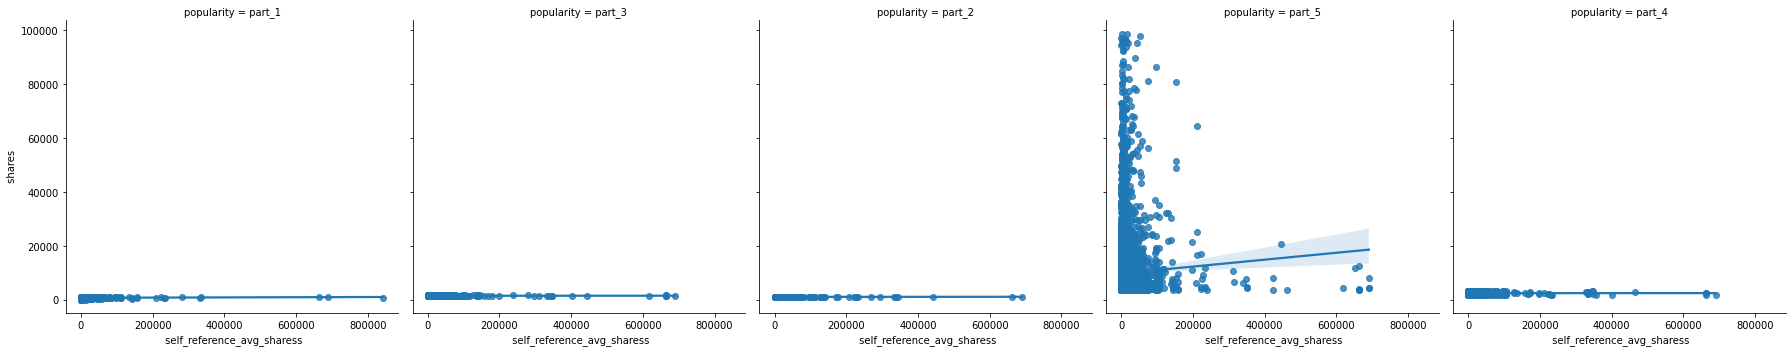

In [79]:
#self_reference_avg_sharess
temp_data = data[data[' shares'] <= 100000]
noise_data  = data[data[' self_reference_avg_sharess'] == 0]
print (noise_data.shape)
#plt.figure(figsize=(30,10))
sns.scatterplot(x=' self_reference_avg_sharess',y=' shares', hue='popularity', data=temp_data)
sns.lmplot(x=' self_reference_avg_sharess', y=' shares', col='popularity', data=temp_data)

Normal Distribution analysis for 'Shares'

Normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics) and some machine learning models. We evaluated the impact of this normaility on our models

In [80]:


print("Skewness: %f" % data[' shares'].skew())
print("Kurtosis: %f" % data[' shares'].kurt())



Skewness: 34.952465
Kurtosis: 1909.931080


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


"\n'Shares' doesn't have a normal distribution. It shows 'peakedness', positive skewness and does not follow the diagonal line.\nThus some statistic analysis might not be suitable for it\n\n"

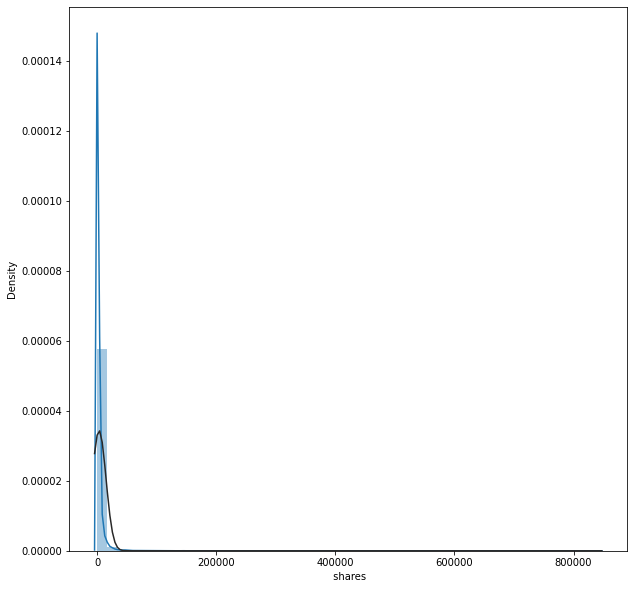

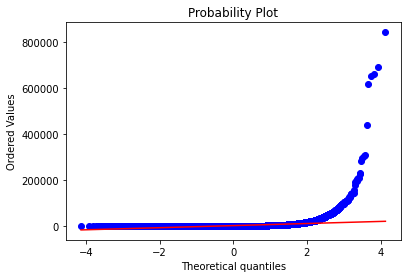

In [81]:
from scipy.stats import norm, probplot

#histogram and normal probability plot
temp_data = data[data[' shares'] <= 100000]
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(data[' shares'], fit=norm);
fig = plt.figure()
res = probplot(data[' shares'], plot=plt)
'''
'Shares' doesn't have a normal distribution. It shows 'peakedness', positive skewness and does not follow the diagonal line.
Thus some statistic analysis might not be suitable for it

'''



Although shares doesn't have a normal distrubition, we can do a log transformation to give us a normal distrubition data


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


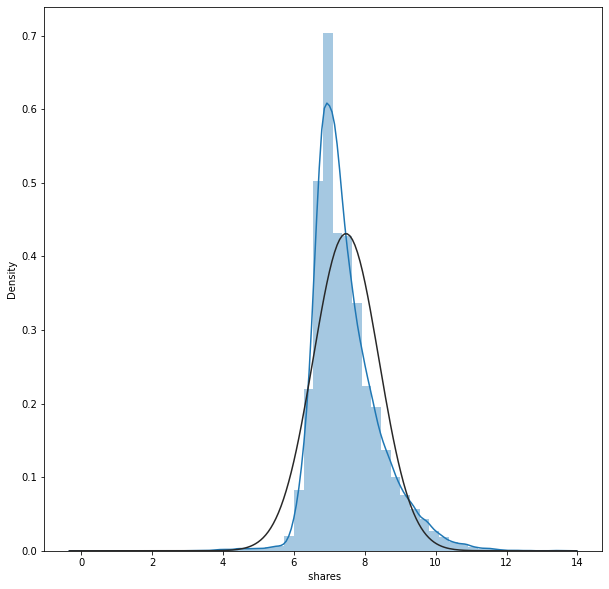

In [84]:
from copy import copy

#applying log transformation
new_shares_data = copy(data)

new_shares_data.loc[new_shares_data[' shares'] > 0, ' shares'] = np.log(data.loc[data[' shares'] > 0, ' shares'])
new_shares_log = new_shares_data[' shares']
#transformed histogram and normal probability plot
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(new_shares_log, fit=norm);
fig = plt.figure()
res = probplot(new_shares_log, plot=plt)

In [86]:
#Check for missing data
total = new_shares_data.isnull().sum().sort_values(ascending=False)
percent = (new_shares_data.isnull().sum()/new_shares_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total  Percent
 n_tokens_title        0      0.0
 n_tokens_content      0      0.0
 LDA_01                0      0.0
 LDA_02                0      0.0
 LDA_03                0      0.0

Feature Extraction & Selection

Here we will be extracting some of the best features we observed out from the data. The below criteria will be considered:

    Feature selection based on best hypothesis observed
    Feature Selection on the whole dataset
    Feature selection using fisher discriminal analysis
    Feature selection based on the best hypothesis observed but with a normal distribution (log transformation)
    Feature selection using fisher discriminate analysis on normal distribution dataset
    Feature Selection on the whole dataset - Normal Distribution



Feature Selection on the whole dataset

In [87]:
# shares data is not needed for classification
data_without_shares = data.drop(labels=[' shares'], axis = 1, inplace=False)

training_set = data_without_shares.iloc[:, :(data_without_shares.shape[1]-1)]
# convert categorical variables into dummy - it use one-hot encoding
training_set = pd.get_dummies(training_set)

# extract the label data in this case popularity
label_set = data_without_shares.iloc[:, (data_without_shares.shape[1]-1):].values

data_feature2 = copy(training_set)


Feature selection based on best hypothesis observed

In [88]:
# only the best observed features are extracted here
data_feature1 =training_set[[' n_tokens_title',' n_tokens_content',' n_unique_tokens',' num_hrefs',
                       ' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',' num_keywords',
                       ' kw_avg_avg',' self_reference_avg_sharess',' global_subjectivity',
                       ' global_sentiment_polarity',' global_rate_positive_words',' global_rate_negative_words',' avg_positive_polarity',
                       ' avg_negative_polarity',' title_sentiment_polarity','weekdays_Friday', 'weekdays_Monday', 'weekdays_Saturday',
       'weekdays_Sunday', 'weekdays_Thursday', 'weekdays_Tueday',
       'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World']]

In [89]:
data_feature1.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' kw_avg_avg',
       ' self_reference_avg_sharess', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' avg_positive_polarity',
       ' avg_negative_polarity', ' title_sentiment_polarity',
       'weekdays_Friday', 'weekdays_Monday', 'weekdays_Saturday',
       'weekdays_Sunday', 'weekdays_Thursday', 'weekdays_Tueday',
       'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World'],
      dtype='object')


Feature Selection Based on Fisher Discrimating Analysis

In [90]:
# helper function for evalating the fisher ndex
def fisher_index_calc(trainingSet, labelSet):
    (dim1_T, dim2_T) = trainingSet.shape
    (dim1_L, dim2_L) = labelSet.shape

    # create the fisher output variable - A vector of all the features
    fisher_ratios = np.zeros((1, dim2_T), dtype=float).flatten()
    # It's expected that the dim1_T and dim1_L be of the same size, else this input parameters is nulled.
    if dim1_L != dim1_T:
        return fisher_ratios

    # First extract out the number of features available.
    # grouped both data together, and create a pandas dataframe from it.
    train1 = pd.DataFrame(trainingSet)
    label1 = pd.DataFrame(labelSet, columns=['LABEL'])
    grouped = pd.concat([train1, label1], axis=1)

    # fetch the number of classes
    (no_classes, demo) = grouped.groupby('LABEL').count()[[0]].shape
    #print grouped

    # loop through all features
    for j in range(dim2_T):
        # the variance of the feature j
        j_variance = np.var(trainingSet[:,j])
        j_mean = np.mean(trainingSet[:,j])
        j_summation = 0
        for k in range(no_classes):
            output = grouped.groupby('LABEL').count()[[j]]
            k_feature_count = output.iloc[k,0]
            # mean for class k of feature j
            output = grouped.groupby('LABEL').mean()[[j]]
            k_feature_mean = output.iloc[k,0]
            currentSum = k_feature_count * np.square((k_feature_mean - j_mean))
            j_summation = j_summation + currentSum
        fisher_ratios[j] = j_summation / np.square(j_variance)

    return fisher_ratios

In [91]:
# calculates the fisher score of the features
fisher_scores = fisher_index_calc(training_set.values, label_set)

df = pd.DataFrame({'Fisher Ratio For All Features': fisher_scores})

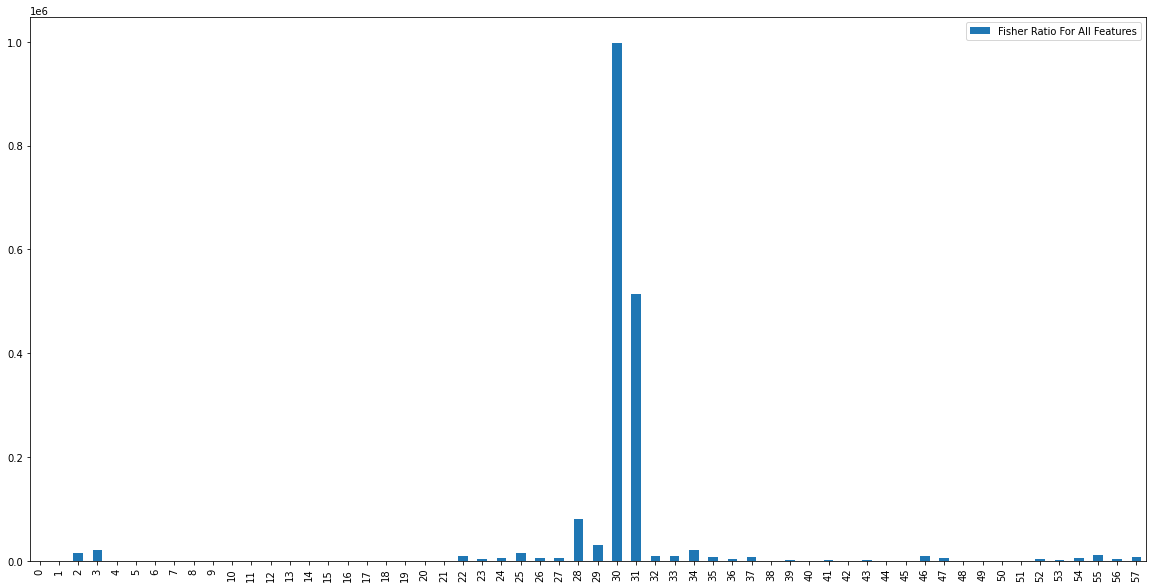

In [92]:
# plot the fisher analysis score
ax = df.plot.bar(figsize=(20,10))
plt.show()

In [93]:
# feature selection based on fisher score
# Fisher Index Ratio Filter - Remove features with low score
# indices of features to remove based on fisher ratios
to_remove = []
for i in range((len(fisher_scores))):
    if fisher_scores[i] < 3000:
        # we mark for removal
        to_remove.append(i)

# remove features with low fisher score
data_feature_fisher = training_set.drop(training_set.columns[to_remove], axis=1, inplace=False)
print ("fisher based features - ", data_feature_fisher.shape)
data_feature_fisher.columns

fisher based features -  (38462, 25)


Index([' n_unique_tokens', ' n_non_stop_unique_tokens', ' is_weekend',
       ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity', 'weekdays_Saturday',
       'weekdays_Sunday', 'data_channel_Entertainment', 'data_channel_Others',
       'data_channel_Social Media', 'data_channel_Tech', 'data_channel_World'],
      dtype='object')


Finding the normal distrubution of the dataset

In [94]:
# use log transformation to transform each features to a normal distribution
training_set_normal = copy(training_set)

# note log transformation can only be performed on data without zero value
for col in training_set_normal.columns:
    #applying log transformation
    temp = training_set_normal[training_set_normal[col] == 0]
    # only apply to non-zero features
    if temp.shape[0] == 0:
        training_set_normal[col] = np.log(training_set_normal[col])
        print (col)
    else:
        # attempt to only transform the positive values alone
        training_set_normal.loc[training_set_normal[col] > 0, col] = np.log(training_set_normal.loc[training_set_normal[col] > 0, col])

 n_tokens_title
 n_tokens_content
 n_unique_tokens
 n_non_stop_unique_tokens
 average_token_length
 num_keywords
 LDA_00
 LDA_01
 LDA_02
 LDA_03
 LDA_04



Feature selection based on best hypothesis observed - Normal distribution

In [95]:
# only the best observed features are extracted here
data_feature1_normal =training_set_normal[[' n_tokens_title',' n_tokens_content',' n_unique_tokens',' num_hrefs',
                       ' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',' num_keywords',
                       ' kw_avg_avg',' self_reference_avg_sharess',' global_subjectivity',
                       ' global_sentiment_polarity',' global_rate_positive_words',' global_rate_negative_words',' avg_positive_polarity',
                       ' avg_negative_polarity',' title_sentiment_polarity','weekdays_Friday', 'weekdays_Monday', 'weekdays_Saturday',
       'weekdays_Sunday', 'weekdays_Thursday', 'weekdays_Tueday',
       'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World']]


Feature Selection Based on Fisher Discrimating Analysis - Normal Distribution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


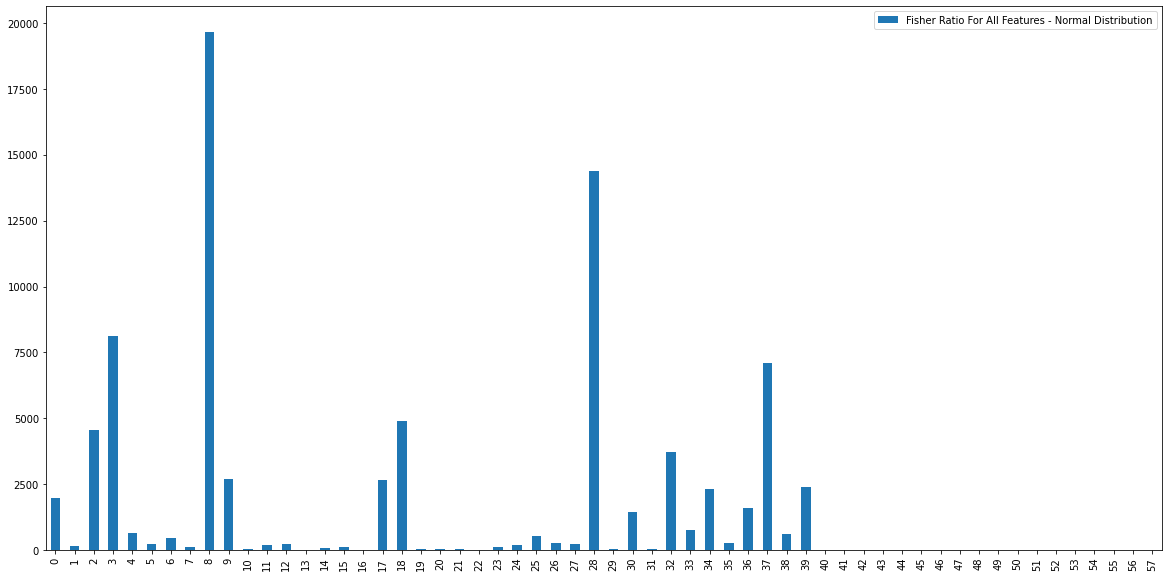

In [96]:
# calculates the fisher score of the features
fisher_scores_normal = fisher_index_calc(training_set_normal.values, label_set)

df = pd.DataFrame({'Fisher Ratio For All Features - Normal Distribution': fisher_scores_normal})
# plot the fisher analysis score
ax = df.plot.bar(figsize=(20,10))
plt.show()

In [97]:
# feature selection based on fisher score
# Fisher Index Ratio Filter - Remove features with low score
# indices of features to remove based on fisher ratios
to_remove = []
for i in range((len(fisher_scores_normal))):
    if fisher_scores_normal[i] < 1000:
        # we mark for removal
        to_remove.append(i)

# remove features with low fisher score
data_feature_fisher_normal = training_set_normal.drop(training_set_normal.columns[to_remove], axis=1, inplace=False)
# ihave about 25 features left.
print ("fisher based features : Normal distributions - ", data_feature_fisher_normal.shape)
data_feature_fisher_normal.columns

fisher based features : Normal distributions -  (38462, 29)


Index([' n_tokens_title', ' n_unique_tokens', ' n_non_stop_unique_tokens',
       ' average_token_length', ' num_keywords', ' kw_max_avg', ' kw_avg_avg',
       ' is_weekend', ' global_subjectivity', ' global_rate_positive_words',
       ' rate_positive_words', ' avg_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' max_negative_polarity', 'weekdays_Friday', 'weekdays_Monday',
       'weekdays_Saturday', 'weekdays_Sunday', 'weekdays_Thursday',
       'weekdays_Tueday', 'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World'],
      dtype='object')


Feature Selection on the whole dataset - Normal Distribution

In [98]:
data_feature2_normal = copy(training_set_normal)

Visulazing the impact of normal distribution on the data

In the new transformation, the features observation is more clear than before.

In [99]:


temp_data_normal = pd.concat([training_set_normal, pd.DataFrame(new_shares_log, columns=[' shares'])], axis=1)
label_set6 = data_without_shares.iloc[:, (data_without_shares.shape[1]-1):]
temp_data_normal = pd.concat([temp_data_normal, label_set6], axis=1)



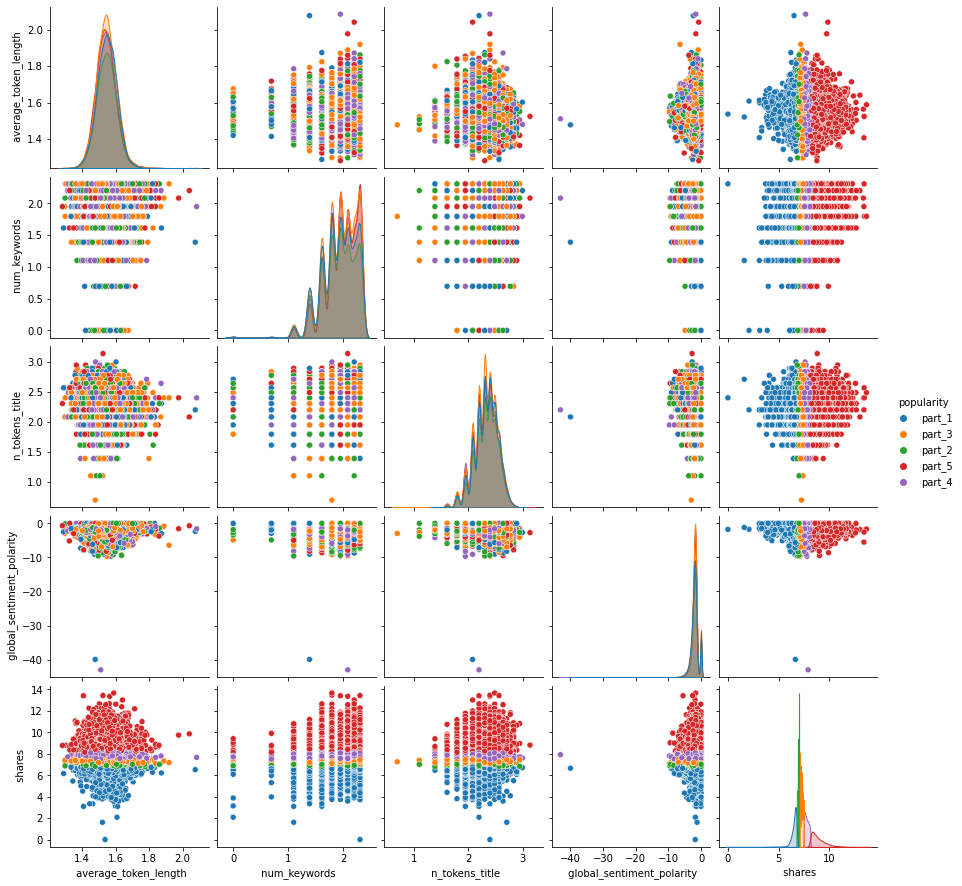

In [100]:
temp_data = temp_data_normal[temp_data_normal[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' average_token_length', ' num_keywords', ' n_tokens_title', ' global_sentiment_polarity', ' shares']
# run a pairplot
sns.pairplot(temp_data_normal, vars=kw_cols, hue='popularity', diag_kind='kde')

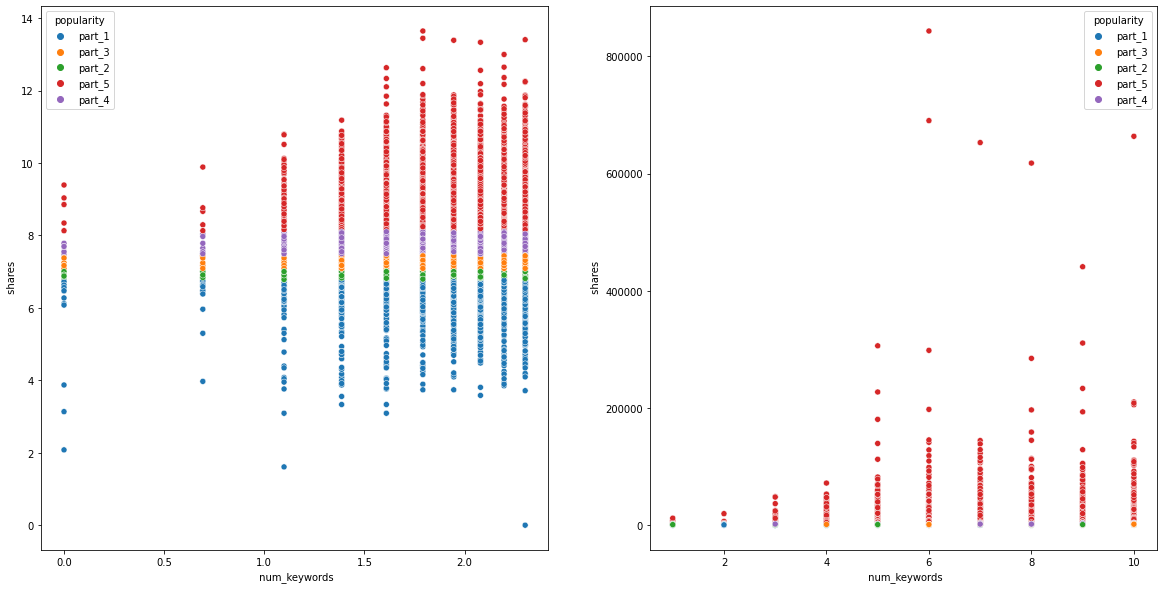

In [101]:
#n_tokens_title
fig, axs = plt.subplots(figsize=(20,10), nrows=1,ncols=2)
sns.scatterplot(x=' num_keywords',y=' shares', hue='popularity', data=temp_data_normal, ax=axs[0])
sns.scatterplot(x=' num_keywords',y=' shares', hue='popularity', data=data, ax=axs[1])

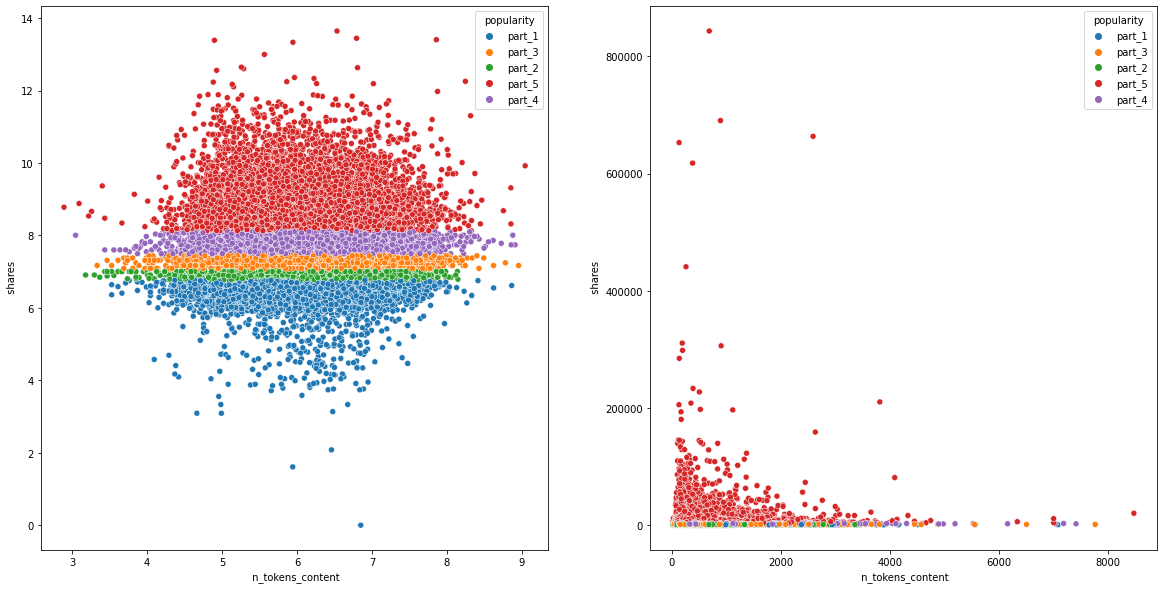

In [102]:


#n_tokens_content
fig, axs = plt.subplots(figsize=(20,10), nrows=1,ncols=2)
sns.scatterplot(x=' n_tokens_content',y=' shares', hue='popularity', data=temp_data_normal, ax=axs[0])
sns.scatterplot(x=' n_tokens_content',y=' shares', hue='popularity', data=data, ax=axs[1])



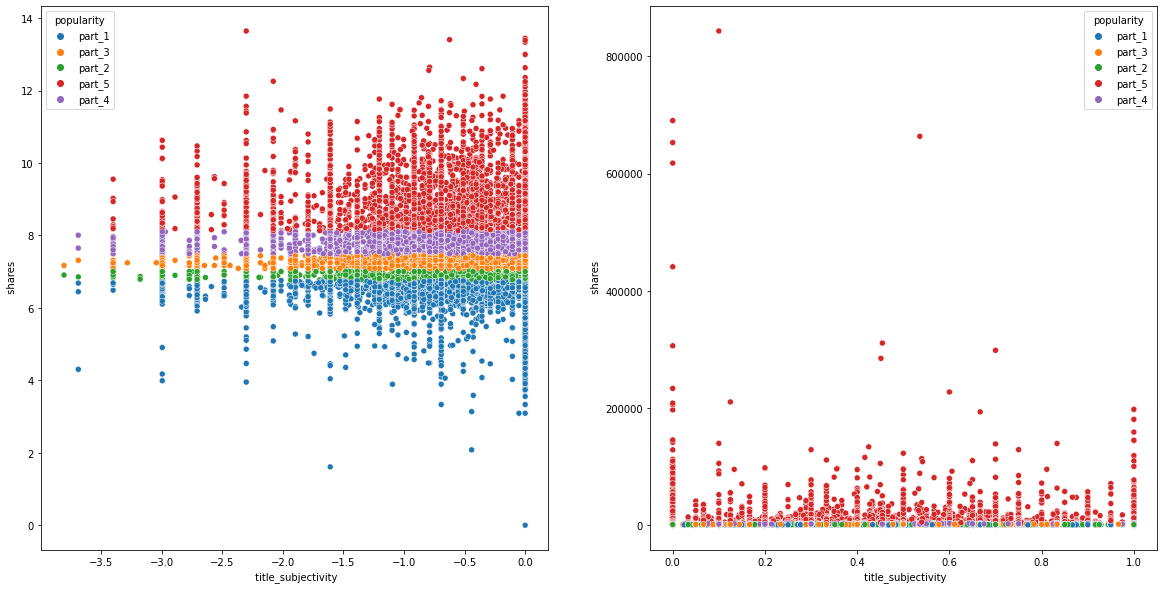

In [103]:
#title_subjectivity
fig, axs = plt.subplots(figsize=(20,10), nrows=1,ncols=2)
sns.scatterplot(x=' title_subjectivity',y=' shares', hue='popularity', data=temp_data_normal, ax=axs[0])
sns.scatterplot(x=' title_subjectivity',y=' shares', hue='popularity', data=data, ax=axs[1])


Variables of our features selection are listed below:

    Feature selection based on best hypothesis observed - data_feature1
    Feature Selection on the whole dataset - data_feature2
    Feature selection using fisher discriminal analysis - data_feature_fisher
    Feature selection based on the best hypothesis observed but with a normal distribution (log transformation) - data_feature1_normal
    Feature selection using fisher discriminate analysis on normal distribution dataset - data_feature_fisher_normal
    Feature Selection on the whole dataset - data_feature2_normal




Machine Learning - Supervised Learning Classification

    Here, we are going to apply some machine learing models on our dataset for classifying an article popularity



In [104]:
# normalizaling the data with standard scaler
# we will normalized all the features selections

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scalled all the feature selections
data_feature1_nor = scaler.fit_transform(data_feature1.values)
data_feature2_nor = scaler.fit_transform(data_feature2.values)
data_feature_fisher_nor = scaler.fit_transform(data_feature_fisher.values)
data_feature1_normal_nor = scaler.fit_transform(data_feature1_normal.values)
data_feature_fisher_normal_nor = scaler.fit_transform(data_feature_fisher_normal.values)
data_feature2_normal_nor = scaler.fit_transform(data_feature2_normal.values)

features_selection = [data_feature1_nor, data_feature2_nor, data_feature_fisher_nor, data_feature1_normal_nor, 
                     data_feature_fisher_normal_nor, data_feature2_normal_nor]

features_selection_labels = ['Features on Hypothesis', 'All Features', 'Fisher based Features', 
                             'Features on Hypothesis - Normal Distribution', 'Fisher based Features - Normal Distribution',
                             'All Features - Normal Distribution']

In [105]:
data.head(n=5)

n_tokens_title   n_tokens_content   n_unique_tokens  \
0             12.0              219.0          0.663594   
1              9.0              255.0          0.604743   
2              9.0              211.0          0.575130   
3              9.0              531.0          0.503788   
4             13.0             1072.0          0.415646   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   num_keywords  ...  \
0          0.0               4.680365            5.0  ...   
1          0.0               4.913725            4.0  ...   
2          0.0               4.393365            6.0  ...   
3          0.0               4.404896            7.0  ...   
4          0.0               4.682836            7.0  ...   

   max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                    0.7              -0.350000                  -0.600   
1                    0.7              -0.118750                  -0.125   
2                    1.0              -0.466667                  -0.800   
3                    0.8              -0.369697                  -0.600   
4                    1.0              -0.220192                  -0.500   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -0.200000             0.500000                  -0.187500   
1               -0.100000             0.000000                   0.000000   
2               -0.133333             0.000000                   0.000000   
3               -0.166667             0.000000                   0.000000   
4               -0.050000             0.454545                   0.136364   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  popularity  
0                 0.000000                       0.187500      593      part_1  
1                 0.500000                       0.000000      711      part_1  
2                 0.500000                       0.000000     1500      part_3  
3                 0.500000                       0.000000     1200      part_3  
4                 0.045455                       0.136364      505      part_1  

[5 rows x 48 columns]

In [106]:
# encoding the label set with a label encoder
from sklearn.preprocessing import LabelEncoder

labelEn = LabelEncoder()
encoded_labels = labelEn.fit_transform(data.loc[:, 'popularity'].values)
class_names = labelEn.classes_
class_names

array(['part_1', 'part_2', 'part_3', 'part_4', 'part_5'], dtype=object)

In [107]:
# Splitting the data for Training and Testing
from sklearn.model_selection import train_test_split, GridSearchCV

# train and test for a feature selections
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_feature1_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_feature2_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data_feature_fisher_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(data_feature1_normal_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(data_feature_fisher_normal_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(data_feature2_normal_nor, encoded_labels, test_size=0.3, shuffle=False)

In [108]:
from sklearn.metrics import accuracy_score, make_scorer

In [109]:
features_selection[4].shape

(38462, 29)

In [110]:
encoded_labels.shape

(38462,)

In [111]:
# function for confusion matrix

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.32f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout(pad=5, rect= (0, 0, 1, 1))
    return ax


Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

nns = [1, 5, 10, 50, 100, 200, 500, 1000, 2000, 3000]
accuracy = []

for n in nns:    
    clf = RandomForestClassifier(n_estimators=n, n_jobs=5, max_depth=50,
                                 random_state=0)
    clf.fit(X_train_2, y_train_2)  

    # predict the result
    y_pred = clf.predict(X_test_2)
    #print ("Random Forest Classifer Result")
    #print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")
    accuracy.append(100*accuracy_score(y_pred, y_test_2))

In [113]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, max_depth=50,
                             random_state=0)
clf.fit(X_train_2, y_train_2)  

# predict the result
y_pred = clf.predict(X_test_2)
print ("Random Forest Classifer Result")
print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")

Random Forest Classifer Result
Performance - 32.73247248461739%


[[1253  270  453  101  338]
 [ 906  250  545  178  369]
 [ 622  289  736  386  685]
 [ 335  128  504  445  813]
 [ 239   82  271  248 1093]]


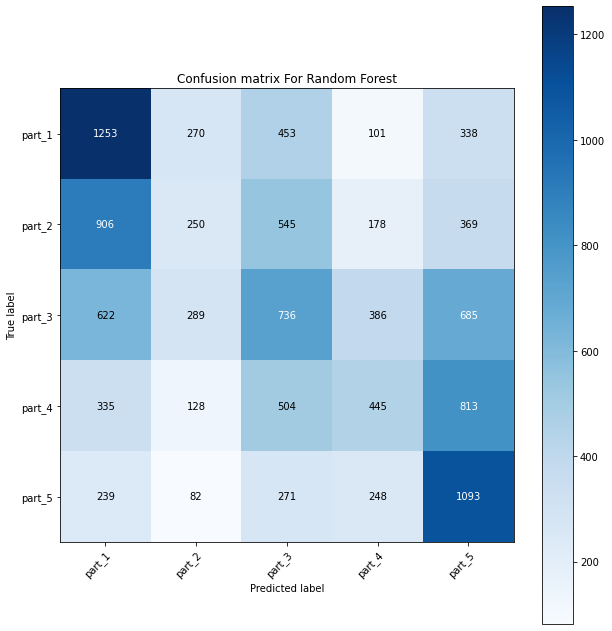

In [114]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_2, y_pred, classes=class_names,
                      title='Confusion matrix For Random Forest')

In [115]:
plt.figure(figsize=(10,7))
plt.plot(nns, accuracy, 'r-', label='Random Forest Accuracy Vs Number of Tress')
plt.plot(nns, accuracy, 'bx')
plt.xlabel('Random Forest Tree Sizes')
plt.ylabel('Random Forest Accuracy')
plt.legend()
plt.grid()
plt.title('Random Forest Accuracy Vs Number of Tress')
plt.show()

In [116]:
# iterating through all the possible features

clf = RandomForestClassifier(n_estimators=1000, n_jobs=5, max_depth=50,
                                 random_state=0)

for i in range(len(features_selection)):
    X_train, X_test, y_train, y_test = train_test_split(features_selection[i], encoded_labels, test_size=0.3, shuffle=False)
        
    # commence training - NOTE: It takes hours to be complete
    clf.fit(X_train, y_train)

    # predict the result
    y_pred = clf.predict(X_test)
    
    print("Result for using Feature Selection - ", features_selection_labels[i])
    print ("Random Forest Classifer Result")
    print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Result for using Feature Selection -  Features on Hypothesis
Random Forest Classifer Result
Performance - 32.37715573273247%
Result for using Feature Selection -  All Features
Random Forest Classifer Result
Performance - 32.73247248461739%
Result for using Feature Selection -  Fisher based Features
Random Forest Classifer Result
Performance - 29.707946962475084%
Result for using Feature Selection -  Features on Hypothesis - Normal Distribution
Random Forest Classifer Result
Performance - 29.1013086055984%
Result for using Feature Selection -  Fisher based Features - Normal Distribution
Random Forest Classifer Result
Performance - 27.714706647023142%
Result for using Feature Selection -  All Features - Normal Distribution
Random Forest Classifer Result
Performance - 31.025218823121588%
